   <h1 align="center"> <font color='#6F16B0'>Notebook 2: Analyse étude de marché </font> <h1> 

   <h1 align="center"> <font color='#6F16B0'> Introduction </font> <h1> 

<div class="alert alert-block alert-info">
    <b></b> Bonjour, 
Pour rappel j’interviens suite à une demande : je travail pour « La poule qui chante » une entreprise française agroalimentaire qui souhaite développer son commerce à l’international. Dans les prémices de ce projet il faudrait réaliser une première analyse préliminaire permettant de proposer un premier groupe de pays susceptibles d’être le plus opportuns pour notre commerce. C’est dans ce contexte ou j’interviens en faisant une première analyse des groupements des pays que l’on peut cibler pour exporter nos poulets. Dans un premier temps j’expliquerai mon choix des données utilisées ainsi que le nettoyage que j’ai effectué dessus. Puis dans un second temps je présenterai mon analyse du choix du groupe de pays choisis. 
        </div>

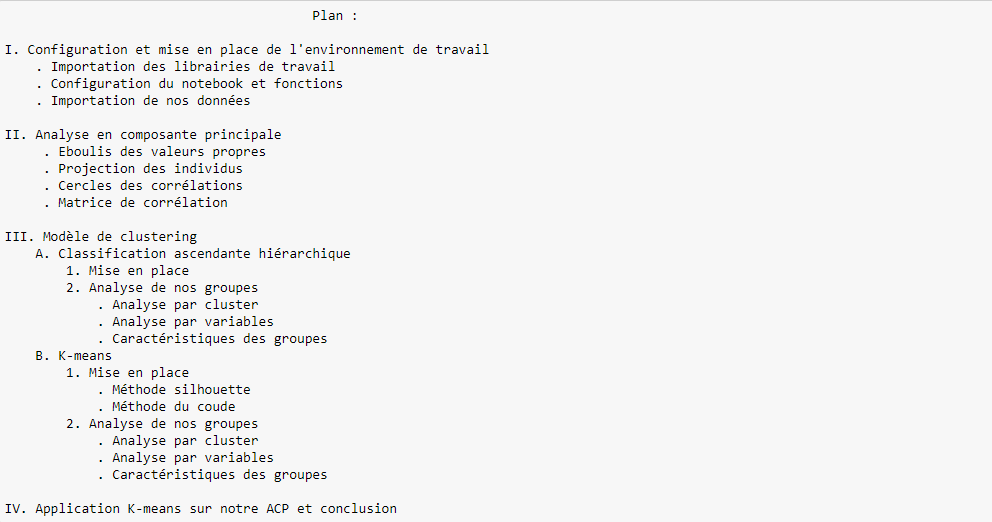

<h1 align="center"> <font color='#6F16B0'>I. Configuration et mise en place de l'environnement de travail</font>  <h1>

<h4 align="center"> <font color='#6F16B0'>Importation des librairies de travail</font>  <h4> 

In [1]:
# Importation de la librairie Pandas et numpy
import pandas as pd
import numpy as np

# Importation pour éviter les messages rouges d'erreurs
import warnings
warnings.filterwarnings("ignore")

# Importation datetime
from datetime import datetime
from datetime import date

# Import librairies pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Import CAH
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Import méthode silhouette
from sklearn import cluster, metrics

# Import méthode coude et K means
from sklearn.cluster import KMeans

<h4 align="center"> <font color='#6F16B0'> Configuration du notebook et fonctions </font> <h4> 

In [2]:
# Configuration du display options afficher toutes les lignes
pd.set_option("display.max_rows", None)

In [3]:
 # Cercle des correlations: 
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)
    
#-----------------------------------------------------------------------------------------------------------------------------    
    
# Projection des individus sur le plan factoriel: 
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (4,3)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette=["#00992C","#b50404", "#3443eb", "#FFF933", "#9D00B2", "#9A6000"])

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show() 

#-----------------------------------------------------------------------------------------------------------------------------    
    
# Création d'une fonction qui permet d'afficher un boxplot de chaque variables d'un df d'analyse. 
# Ici seulement dispo protéines sachant que très corrélées aux autres variables de dispo
def Boxplot(df_cluster):
    
    plt.figure(figsize=(12, 12))
    sns.set(style="whitegrid")

    plt.subplot(521)
    sns.boxplot(data=df_cluster,y='TAS (%)', orient='h', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}, palette=["#20e36b"]).set(ylabel=None)
    plt.title('TAS (%)')

    plt.subplot(522)
    sns.boxplot(data=df_cluster,y='TDI (%)', orient='h', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}, palette=["#20e36b"]).set(ylabel=None)
    plt.title('TDI (%)')

    plt.subplot(523)
    sns.boxplot(data=df_cluster,y='TCD (%)', orient='h', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}, palette=["#20e36b"]).set(ylabel=None)
    plt.title('TCD (%)')

    plt.subplot(524)
    sns.boxplot(data=df_cluster, y='Disponibilité de protéines en quantité (g/personne/jour)', orient='h',showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}, palette=["#20e36b"]).set(ylabel=None)
    plt.title('Disponibilité de protéines en quantité (g/personne/jour)')

    plt.subplot(525)
    sns.boxplot(data=df_cluster,y='Nourriture', orient='h', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}, palette=["#20e36b"]).set(ylabel=None)
    plt.title('Nourriture')

    plt.subplot(526)
    sns.boxplot(data=df_cluster,y='Nbr Habitant', orient='h', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}, palette=["#20e36b"]).set(ylabel=None)
    plt.title('Nbr Habitant')

    plt.subplot(527)
    sns.boxplot(data=df_cluster,y='PIB/hab$', orient='h', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}, palette=["#20e36b"]).set(ylabel=None)
    plt.title('PIB/hab$')

    plt.subplot(528)
    sns.boxplot(data=df_cluster,y='Stabilite_Politique', orient='h', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}, palette=["#20e36b"]).set(ylabel=None)
    plt.title('Stabilite_Politique')    

<h4 align="center"> <font color='#6F16B0'> Importation de nos données </font> <h4> 

In [ ]:
# Importation des tables de travail

df = pd.read_csv('C:/Users/User/Desktop/Projet_9/Donnees/df.csv')
dfNorm = pd.read_csv('C:/Users/User/Desktop/Projet_9/Donnees/dfNorm.csv')
dfRobS = pd.read_csv('C:/Users/User/Desktop/Projet_9/Donnees/dfRobS.csv')
dfStand = pd.read_csv('C:/Users/User/Desktop/Projet_9/Donnees/dfStand.csv')

<h1 align="center"> <font color='#6F16B0'> II. Analyse en composante principale </font>  <h1>    

 > *Tout d’abord avant de commencer à réaliser des groupement de pays via des algorithmes de clustering je vais proposer une analyse en composante principale.*

In [4]:
# On place la zone en index dans le dataframe normalisé par un StandardScaler

dfStand.set_index('Zone', inplace = True)
dfStand.head()

,TAS (%),TDI (%),TCD (%),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,Nbr Habitant,PIB/hab$,Stabilite_Politique
Zone,,,,,,,,,,
Afghanistan,-0.610145,0.118183,1.421234,-1.182705,-1.151013,-1.179552,-0.285665,-0.051219,-0.696279,-3.022975
Afrique du Sud,-0.002694,-0.395128,0.155061,0.984516,1.134551,1.255382,0.631064,0.081867,-0.377359,-0.232598
Albanie,-1.050697,0.696309,-1.227865,-0.241842,0.173952,-0.153183,-0.289369,-0.265892,-0.490737,0.498214
Algérie,0.419587,-0.849411,0.624089,-0.875005,-0.869458,-0.922960,-0.188899,-0.018496,-0.510663,-0.941265
Allemagne,0.168723,0.070729,-0.722603,-0.044533,-0.057917,0.151856,0.433828,0.246660,1.576420,0.730746


In [5]:
# Nous gardons les données normalisés dans une matrice X_Scaled
X_Scaled=dfStand.values
# Enregistre les noms de nos pays dans une variable pays
pays = dfStand.index
# enregistre les noms de nos colonnes
features = dfStand.columns

# On va tester sur 8 composantes principales
from sklearn import decomposition

n_components = 8
pca = decomposition.PCA(n_components=n_components)

# On l'entraine sur les données normalisé
pca.fit(X_Scaled)

PCA(n_components=8)

<h4 align="center"> <font color='#6F16B0'> Choix du nombre de composantes principales : Eboulis des valeurs propres </font>  <h4>     

> *On va réaliser un éboulis des valeurs propres qui va nous aider à choisir le nombre de composantes que l’on va utiliser. Il permet de voir combien d’inertie est capté par chaque composantes. On affiche le diagramme qui décrit le pourcentage d’inertie totale associé à chaque axe. On affiche également une courbe qui représente la somme cumulée des inerties.*

In [6]:
# Intéressons nous maintenant à la variance captée par chaque nouvelle composante. 
# Grace à scikit-learn on peut utiliser l'attribut explained_variance_ratio_ :

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.38186195 0.19865026 0.12901679 0.10931205 0.07125257 0.04548319
 0.03294051 0.02848897]
0.9970062886278449


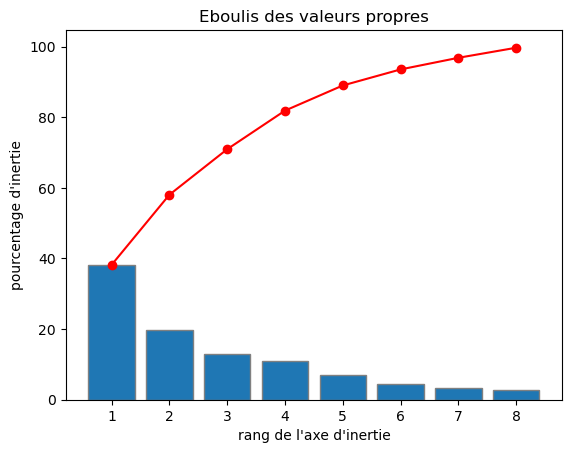

In [7]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree, edgecolor="grey")
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=True)
# Eboulis des valeurs propres
display_scree_plot(pca)

In [8]:
# La somme de l'inertie totale des 4 premiers axes :

n_components = 4
pca = decomposition.PCA(n_components=n_components)
# On l'entraine sur les données normalisé
pca.fit(X_Scaled)
print(pca.explained_variance_ratio_.sum())

0.8188410520986494


- Axe 1 : 38% de l'intertie totale
- Axe 2 : 19% de l'intertie totale
- Axe 3 : 13% de l'intertie totale
- Axe 4 : 10% de l'intertie totale
- Axe 5 : 7% de l'intertie totale
- Axe 6 : 4% de l'intertie totale
- Axe 7 : 3% de l'intertie totale
- Axe 8 : 3% de l'intertie totale

Les 4 premiers axes captent 81% de l'inertie totale. On va donc se restreindre au 4 premier axe. 

                                                Objectif de l'ACP : 
- Etudier la variabilité des individus c'est à dire leurs ressemblances et leurs différences.
- Etudier les liaisons entre les variables et si besoins regrouper les variables liées en de nouvelles variables synthétiques.

Pour chaque objectif nous pouvons utiliser un espace différent. 

<h4 align="center"> <font color='#6F16B0'> Projection des individus </font>  <h4>      

> *Pour étudier la variabilité des pays on propose un nuage des individus c’est à dire un nuage ou chaque point représente un individu et dans lequel chaque dimension correspond à une variable. On peut voir ici que certains points, pays qui sont éloignés les uns des autres. Après nos modèles de clustering on pourra projeter les pays par cluster pour les interpréter.*

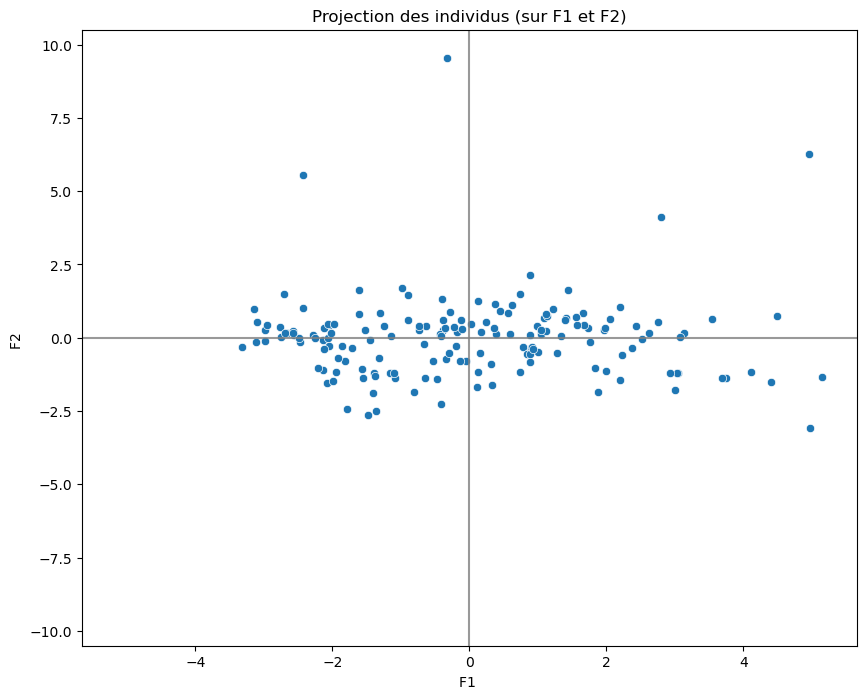

In [9]:
# Via la fonction display_factorial_planes :
# On regarde les projections des individus sur les deux premières composantes 

X_proj = pca.transform(X_Scaled)
x_y = [0,1]
display_factorial_planes(X_proj, x_y)

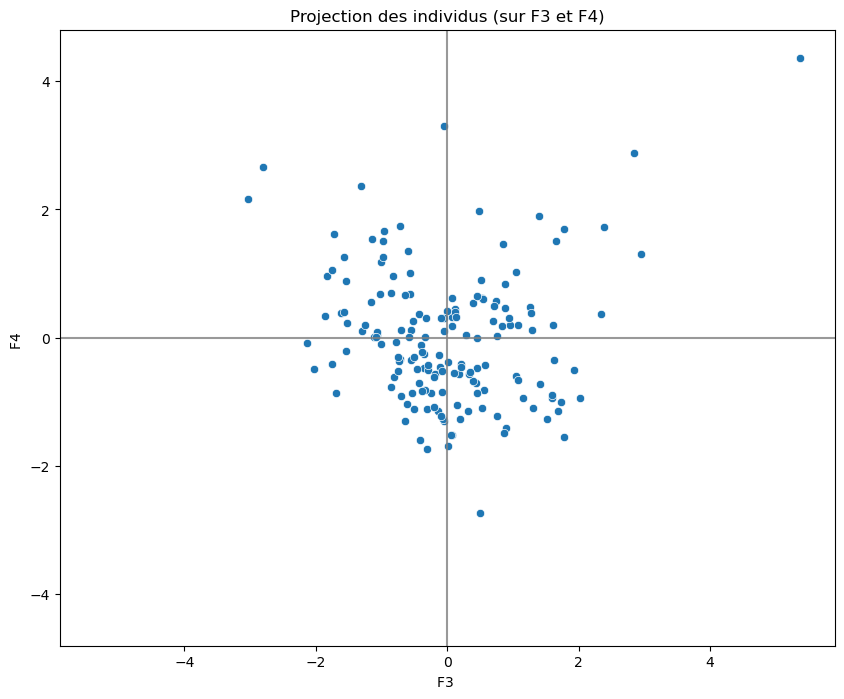

In [10]:
# On regarde les projections des individus sur les deux autres composantes 

x_y = [2,3]
display_factorial_planes(X_proj, x_y)

<h4 align="center"> <font color='#6F16B0'> Cercle des corrélations et matrice </font>  <h4>    

 > *Pour étudier les liaisons entre les variables on propose un cercle des corrélations c’est-à-dire une projection du nuage des variables , ici on place les individus comme dimension de notre espace et les variables comme point, les axes de ce point correspondront à des individus et les points à des variables. Ces vecteurs (flèches) nous indique quelles variables est corrélées ou anti corrélées à un axe.*

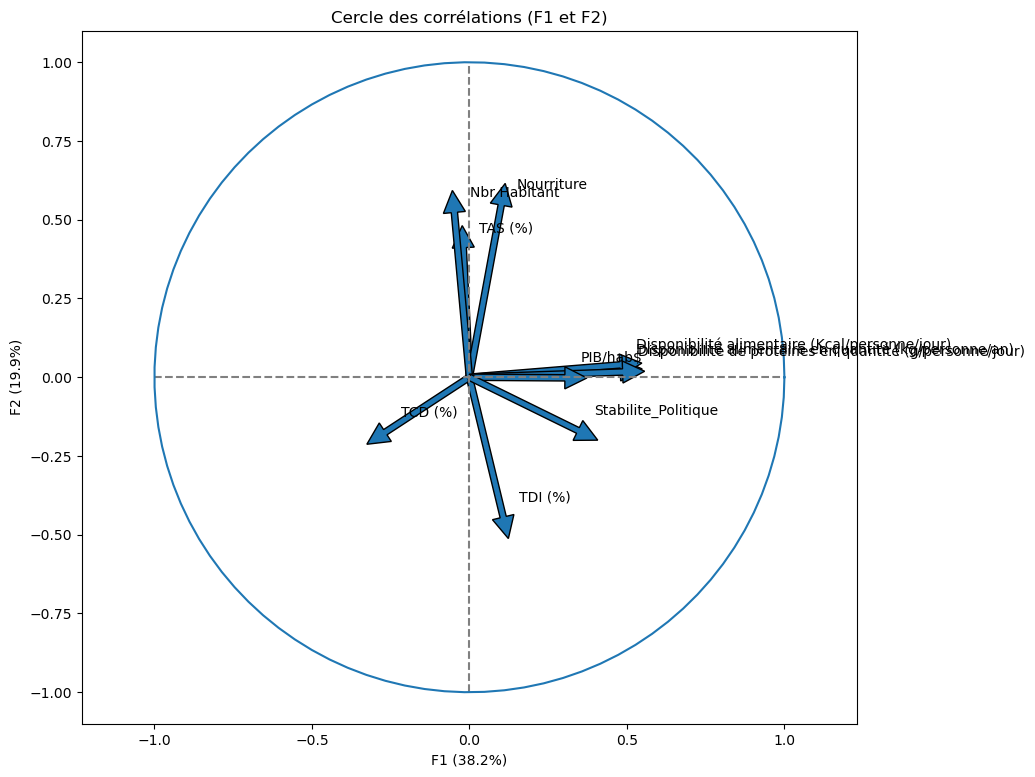

In [11]:
# On affiche le premier cercle des corrélations de nos deux premières composantes

x_y =(0,1)
correlation_graph(pca, x_y, features)

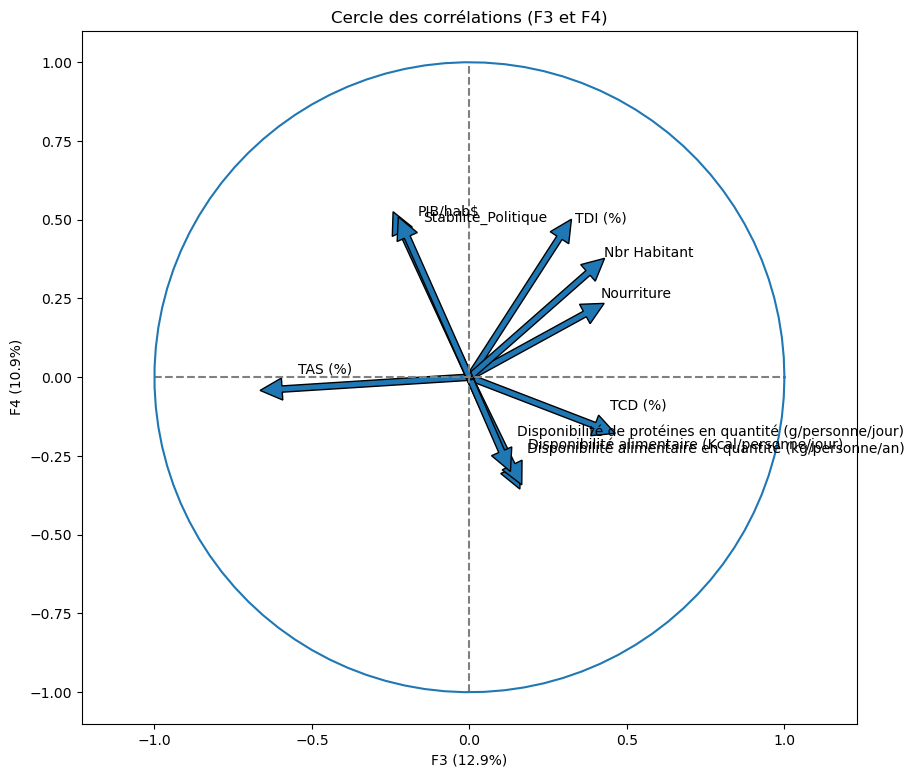

In [12]:
# On affiche le deuxième cercle des corrélations de nos deux dernières composantes

x_y =(2,3)
correlation_graph(pca, x_y, features)

 > *On couple généralement ces cercles des corrélations avec une matrice des corrélation pour mettre des chiffres sur ces liens.*

In [13]:
# création de la matrice de corrélation

t=pca.components_[:]
df_corr = pd.DataFrame(t,index = ['F1', 'F2', 'F3','F4'],columns=dfStand.columns)
df_corr.head()

,TAS (%),TDI (%),TCD (%),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,Nbr Habitant,PIB/hab$,Stabilite_Politique
F1,-0.019471,0.107260,-0.266961,0.478565,0.477694,0.486368,0.100926,-0.047654,0.303087,0.344615
F2,0.411360,-0.444082,-0.174522,0.022972,0.039026,0.016557,0.546381,0.523144,-0.001972,-0.169043
F3,-0.594638,0.285954,0.397638,0.131406,0.135601,0.102354,0.366427,0.376555,-0.212983,-0.197393
F4,-0.037510,0.442793,-0.153060,-0.291306,-0.278665,-0.235156,0.200794,0.331157,0.461802,0.445021


<Axes: >

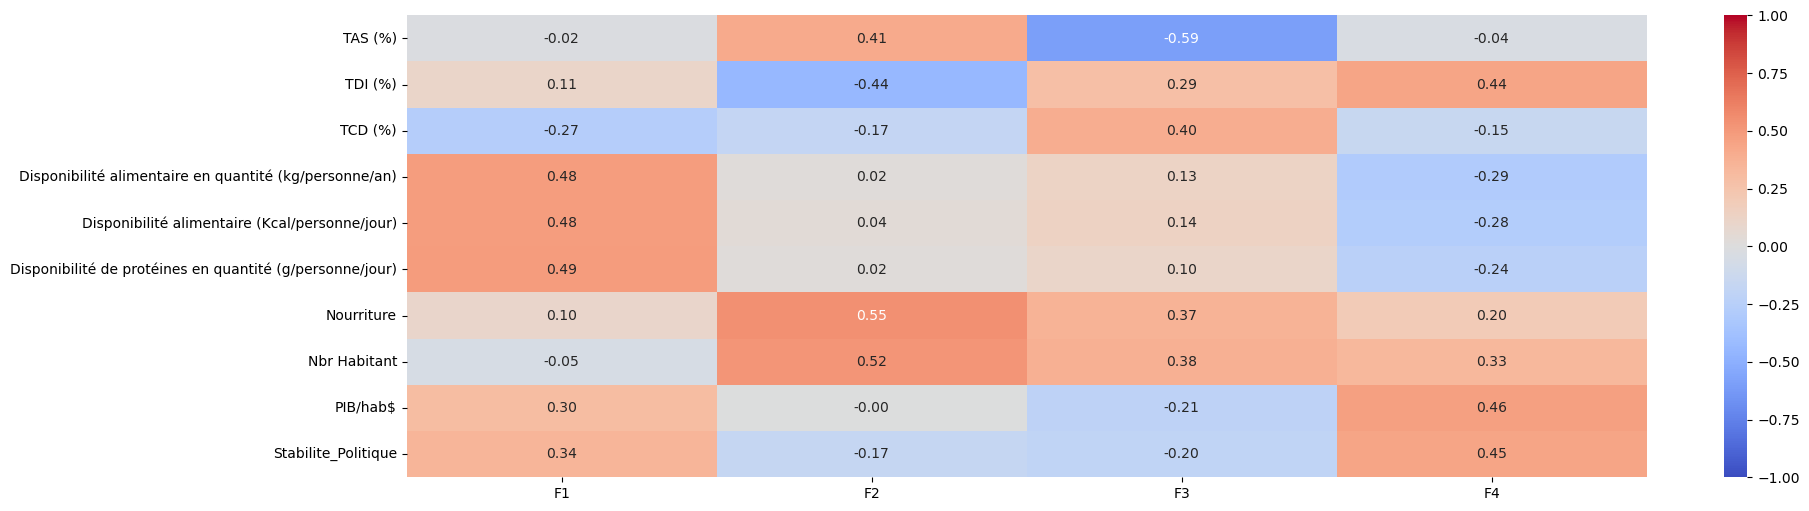

In [14]:
# Visuellement : 

fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(df_corr.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

                                                Observations : 

- F1:
  - Toutes les disponibiltées sont corrélées (0.48), ainsi que plus légèrement la stabilité et le PIB/hab:
  - On peut dire que l'axe F1 représente les disponibilitée

- F2:
  - variables corrélées positivement : La nourriture (0.54) et le nbr_habitant (0.52) sont fortement correlé, le TAS suit juste derrière (0.40) 
  - variables corrélées negativement : Le TDI (-0.44)
  - Les pays qui ont un TAS important (auto-suffisance) ont une tendance positive en terme de quantité de nourriture à disposition et en terme de nombre d'habitant et à contrario une tendance negative dû aux importations 

- F3:
  - variables corrélées positivement : TCD (0.41), nourriture(0.36), nbr habitant(0.37)
  - variables corrélées negativement : Le TAS (-0.59)
  - Les pays ayant un taux d'autosuffiance faible ont une tendance positive en terme de croissance demographique

- F4:
  - variables corrélées positivement : PIB(0.46), Stabilité (0.44), TDI(0.44)
  - Les pays ayant un PIB important ont une tendance positive en stabilité politique et sont aussi dépendant des importations. 

<h1 align="center"> <font color='#6F16B0'> III. Modèle de clustering </font>  <h1>       

<h2 align="center"> <font color='#6F16B0'> A. CLASSIFICATION ASCENDANTE HIÉRARCHIQUE </font>  <h2> 

<h3 align="center"> <font color='#6F16B0'> 1. Mise en place </font>  <h3>       

 > *Le clustering hiérarchique permet de partitionner un jeu de données de manière hiérarchique. A chaque étape, on agrège les deux clusters les plus proches.*

In [15]:
# On définit X la matrice des valeurs de notre dataset dfStand
#dfStand.set_index('Zone', inplace = True)

X = dfStand.values

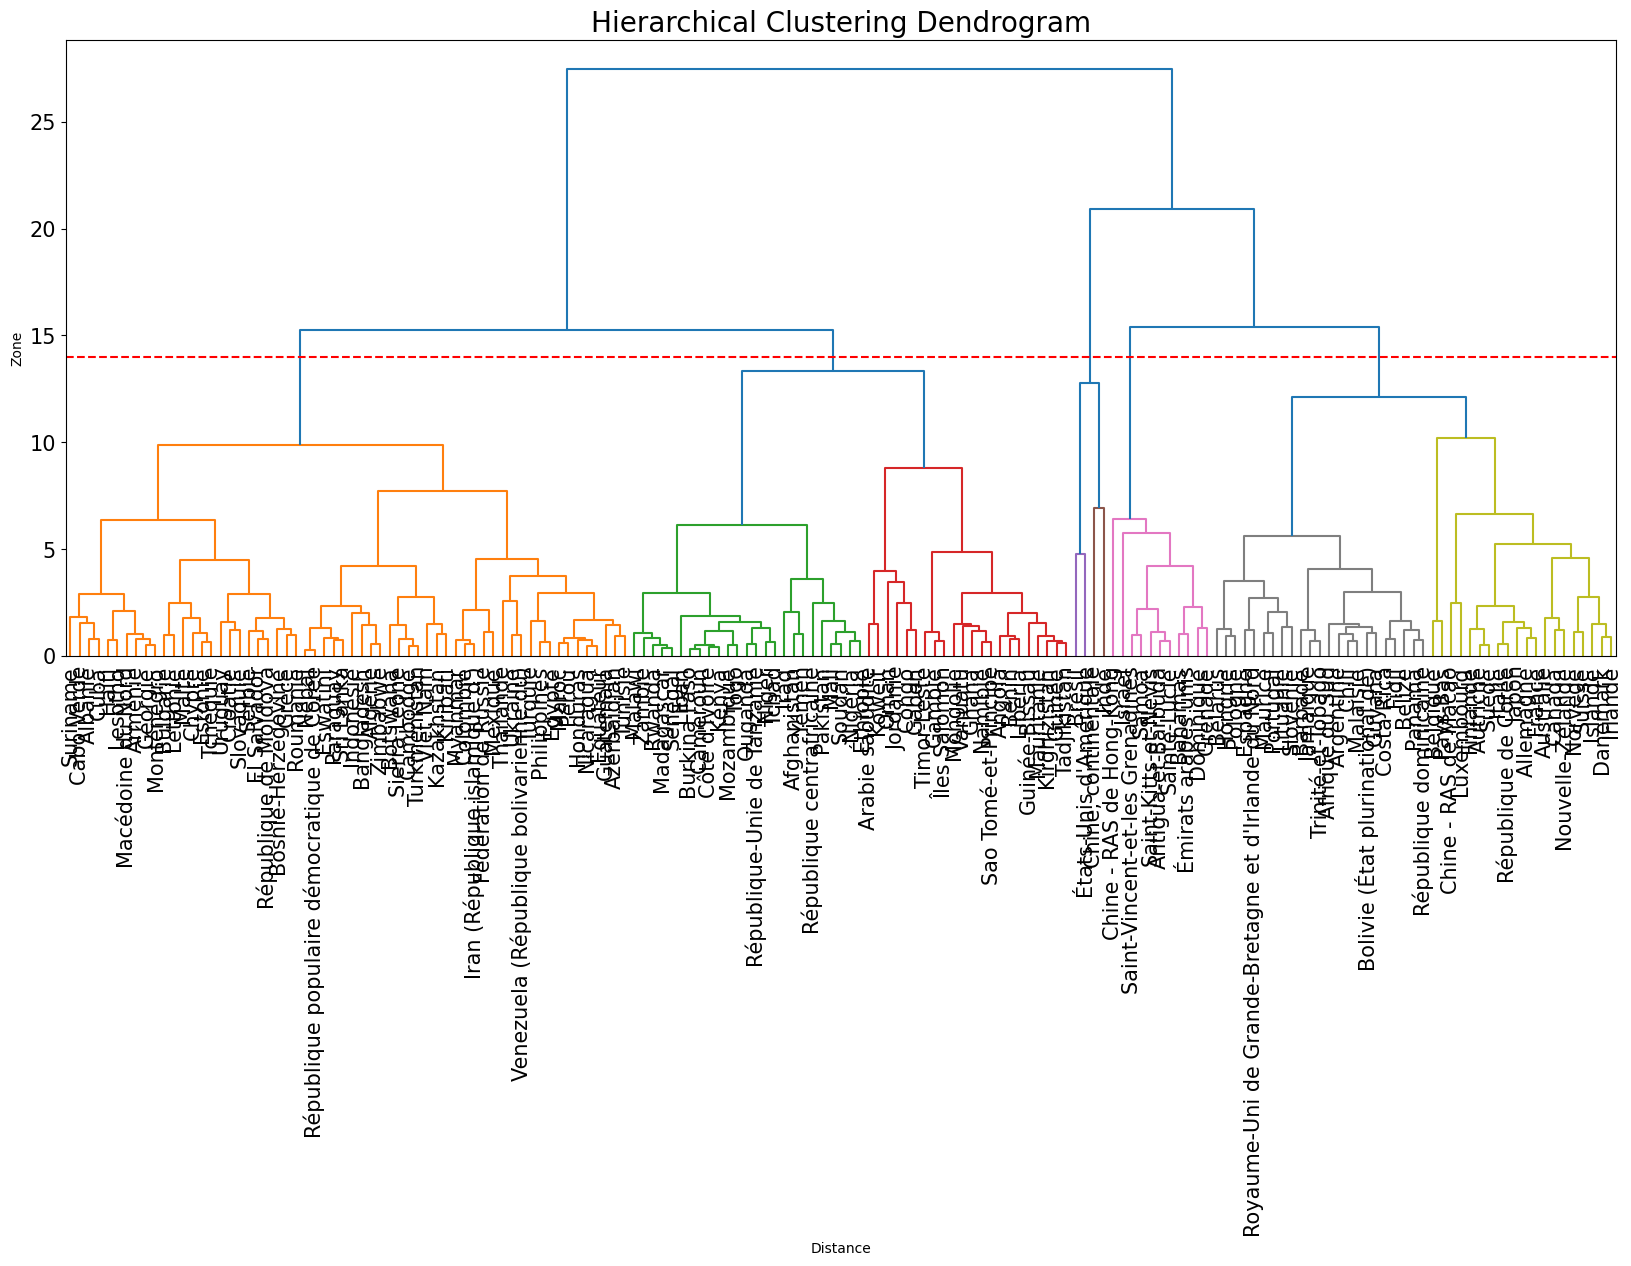

In [16]:
# Graphique : 

fig, ax = plt.subplots(1, 1, figsize=(20,8))
sch.dendrogram(sch.linkage(X, method='ward'), labels = dfStand.index, color_threshold=12, leaf_font_size=5, orientation="top")
plt.axhline(y=14, color='r', linestyle='--')
plt.title("Hierarchical Clustering Dendrogram",  fontsize=20)
ax.set_xlabel("Distance")
ax.set_ylabel("Zone")
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

 > *Ici nous décidons de découper le dendrogamme en 5 groupes pour avoir une première idée du partitionnement.*

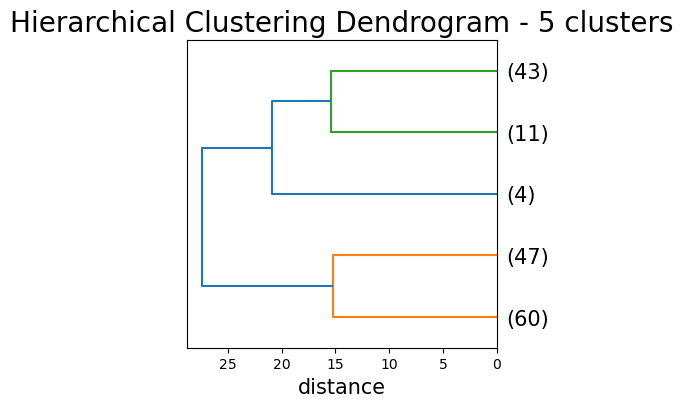

In [17]:
#Découpage du dendrogramme en 5 groupes pour avoir une première idée du partitionnement

fig = plt.figure(figsize=(4,4))
plt.title('Hierarchical Clustering Dendrogram - 5 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)
sch.dendrogram(sch.linkage(X, method='ward'), labels = dfStand.index, p=5, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.show()

In [18]:
# On va donc créer un nouveau dataframe avec une nouvelle colonne correspond au cluster correspond à chaque zone

dfStand_Dendro = dfStand.copy()

In [19]:
# prépare l'algo de clustering:
agg_clustering_Stand = AgglomerativeClustering(n_clusters=5)

# Applique l'algo sur mes données
agg_clustering_Stand.fit(dfStand_Dendro)

AgglomerativeClustering(n_clusters=5)

In [20]:
# Créer une colonne pour mettre les clusters générés dans le dataframe standardisé dendro et notre df final

dfStand_Dendro['cluster_dendro'] = agg_clustering_Stand.labels_
df['cluster_dendro']= agg_clustering_Stand.labels_
df.head()

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$,Stabilite_Politique,cluster_dendro
0,Afghanistan,1.53,5.0,0.54,55000.0,49.12,50.88,36296113.0,12.48,530.0,-2.80,0
1,Afrique du Sud,35.69,143.0,14.11,2035000.0,78.71,24.27,57009756.0,6.19,6724.0,-0.28,1
2,Albanie,16.36,85.0,6.26,47000.0,27.66,80.85,2884169.0,-0.68,4522.0,0.38,4
3,Algérie,6.38,22.0,1.97,264000.0,99.28,0.72,41389189.0,8.52,4135.0,-0.92,4
4,Allemagne,19.47,71.0,7.96,1609000.0,87.06,48.42,82658409.0,1.83,44670.0,0.59,1


<h3 align="center"> <font color='#6F16B0'> 2. Analyse de nos groupes avec le CAH </font>  <h3>      

In [21]:
# Comprendre la caractérisation des clusters:

df.groupby(['cluster_dendro']).mean()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$,Stabilite_Politique
cluster_dendro,,,,,,,,,,
0,8.316383,27.957447,2.894468,1.373617e+05,58.903404,56.320000,2.615449e+07,11.630851,3181.787234,-0.718936
1,29.612326,111.418605,10.671163,5.705814e+05,111.575814,34.320930,2.107311e+07,2.731628,33469.651163,0.655814
2,29.565000,122.250000,10.080000,1.214125e+07,114.870000,0.797500,8.231543e+08,3.182500,19906.000000,-0.267500
3,53.824545,203.545455,19.048182,1.292727e+05,14.890000,111.416364,2.385006e+06,3.004545,21864.636364,0.747273
4,15.897333,57.650000,5.483500,4.983500e+05,80.321833,33.878333,3.083240e+07,3.072667,6831.233333,-0.218333


In [22]:
# Faire une boucle pour récupérer la liste de mes pays par cluster

for i in range(5):
    print(f'Cluster {i}')
    print(dfStand[dfStand_Dendro.cluster_dendro==i].index.tolist())
    print()

Cluster 0
['Afghanistan', 'Angola', 'Arabie saoudite', 'Burkina Faso', 'Bénin', 'Cameroun', 'Congo', "Côte d'Ivoire", 'Gabon', 'Gambie', 'Ghana', 'Guinée', 'Guinée-Bissau', 'Iraq', 'Jordanie', 'Kenya', 'Kirghizistan', 'Koweït', 'Liban', 'Libéria', 'Madagascar', 'Malawi', 'Mali', 'Mauritanie', 'Mongolie', 'Mozambique', 'Namibie', 'Niger', 'Nigéria', 'Oman', 'Ouganda', 'Pakistan', 'Rwanda', 'République centrafricaine', 'République-Unie de Tanzanie', 'Sao Tomé-et-Principe', 'Soudan', 'Sénégal', 'Tadjikistan', 'Tchad', 'Timor-Leste', 'Togo', 'Vanuatu', 'Yémen', 'Zambie', 'Éthiopie', 'Îles Salomon']

Cluster 1
['Afrique du Sud', 'Allemagne', 'Argentine', 'Australie', 'Autriche', 'Barbade', 'Belgique', 'Belize', 'Bolivie (État plurinational de)', 'Bélarus', 'Canada', 'Chili', 'Chine - RAS de Macao', 'Costa Rica', 'Danemark', 'Espagne', 'Fidji', 'Finlande', 'France', 'Guyana', 'Hongrie', 'Irlande', 'Islande', 'Italie', 'Jamaïque', 'Japon', 'Lituanie', 'Luxembourg', 'Malaisie', 'Maurice', 'Nor

<h4 align="center"> <font color='#6F16B0'> Analyse par Cluster </font>  <h4>      

<h5 align="center"> <font color='#6F16B0'> Cluster 0  </font>  <h5>      

In [23]:
df_Dendro_Cluster0 = df.loc[df['cluster_dendro']==0,:]
df_Dendro_Cluster0.describe()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$,Stabilite_Politique,cluster_dendro
count,47.000000,47.000000,47.000000,4.700000e+01,47.000000,47.000000,4.700000e+01,47.000000,47.000000,47.000000,47.0
mean,8.316383,27.957447,2.894468,1.373617e+05,58.903404,56.320000,2.615449e+07,11.630851,3181.787234,-0.718936,0.0
std,10.378916,35.482977,3.669672,2.741900e+05,37.944150,57.820943,4.165977e+07,3.032335,5510.598910,0.929727,0.0
min,0.130000,0.000000,0.040000,2.000000e+03,0.000000,0.000000,2.070890e+05,3.330000,415.000000,-2.940000,0.0
25%,2.280000,8.000000,0.775000,1.950000e+04,23.865000,2.410000,4.630976e+06,10.445000,737.500000,-1.200000,0.0
50%,4.240000,14.000000,1.450000,5.800000e+04,68.290000,36.360000,1.501675e+07,11.320000,1385.000000,-0.560000,0.0
75%,10.615000,35.500000,3.670000,1.030000e+05,97.160000,95.500000,2.888524e+07,12.740000,2642.500000,-0.050000,0.0
max,46.250000,156.000000,15.870000,1.435000e+06,132.650000,220.000000,2.079062e+08,23.940000,29258.000000,0.790000,0.0


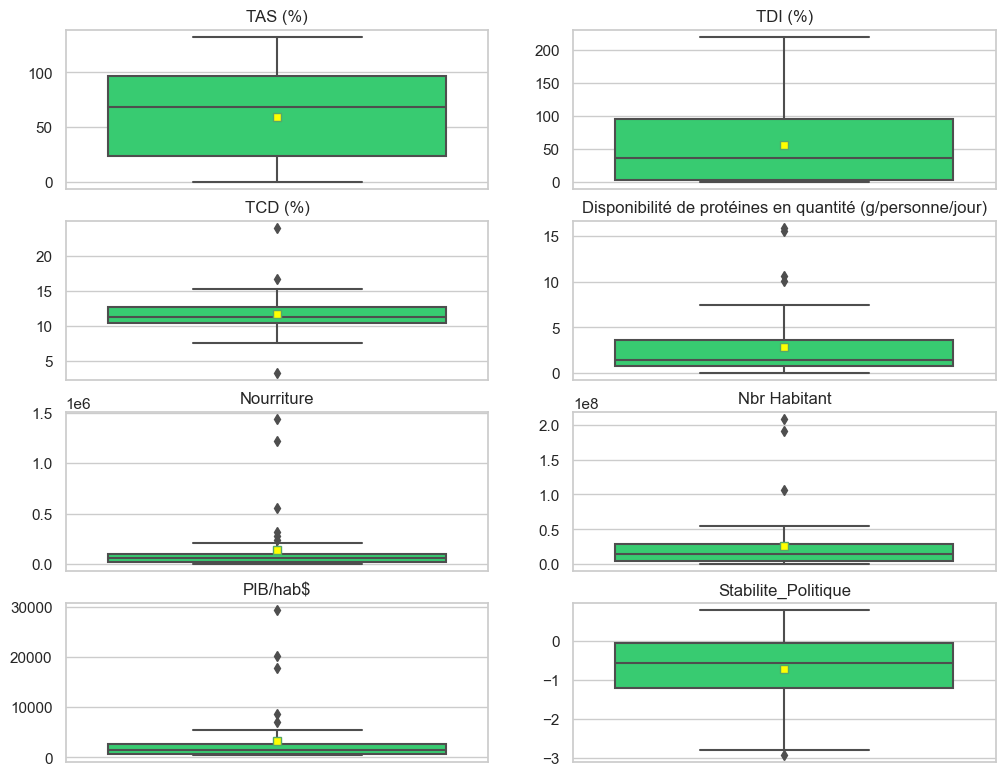

In [24]:
Boxplot(df_Dendro_Cluster0)

<h5 align="center"> <font color='#6F16B0'> Cluster 1  </font>  <h5>   

In [25]:
df_Dendro_Cluster1 = df.loc[df['cluster_dendro']==1,:]
df_Dendro_Cluster1.describe()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$,Stabilite_Politique,cluster_dendro
count,43.000000,43.000000,43.000000,4.300000e+01,43.000000,43.000000,4.300000e+01,43.000000,43.000000,43.000000,43.0
mean,29.612326,111.418605,10.671163,5.705814e+05,111.575814,34.320930,2.107311e+07,2.731628,33469.651163,0.655814,1.0
std,10.105054,41.629450,3.022589,6.924086e+05,54.509997,45.400573,2.777464e+07,2.901427,26002.029333,0.478963,0.0
min,12.650000,44.000000,4.570000,1.000000e+04,0.000000,0.000000,2.862320e+05,-5.430000,3280.000000,-0.280000,1.0
25%,19.900000,70.500000,7.945000,9.050000e+04,87.650000,8.095000,2.883131e+06,0.950000,12866.500000,0.295000,1.0
50%,28.980000,105.000000,10.880000,1.640000e+05,100.000000,20.000000,9.450231e+06,2.240000,28191.000000,0.640000,1.0
75%,35.845000,142.000000,12.845000,1.148000e+06,111.680000,41.365000,3.391837e+07,4.330000,46921.500000,1.025000,1.0
max,54.540000,199.000000,16.630000,2.359000e+06,304.610000,222.370000,1.275027e+08,9.100000,110203.000000,1.590000,1.0


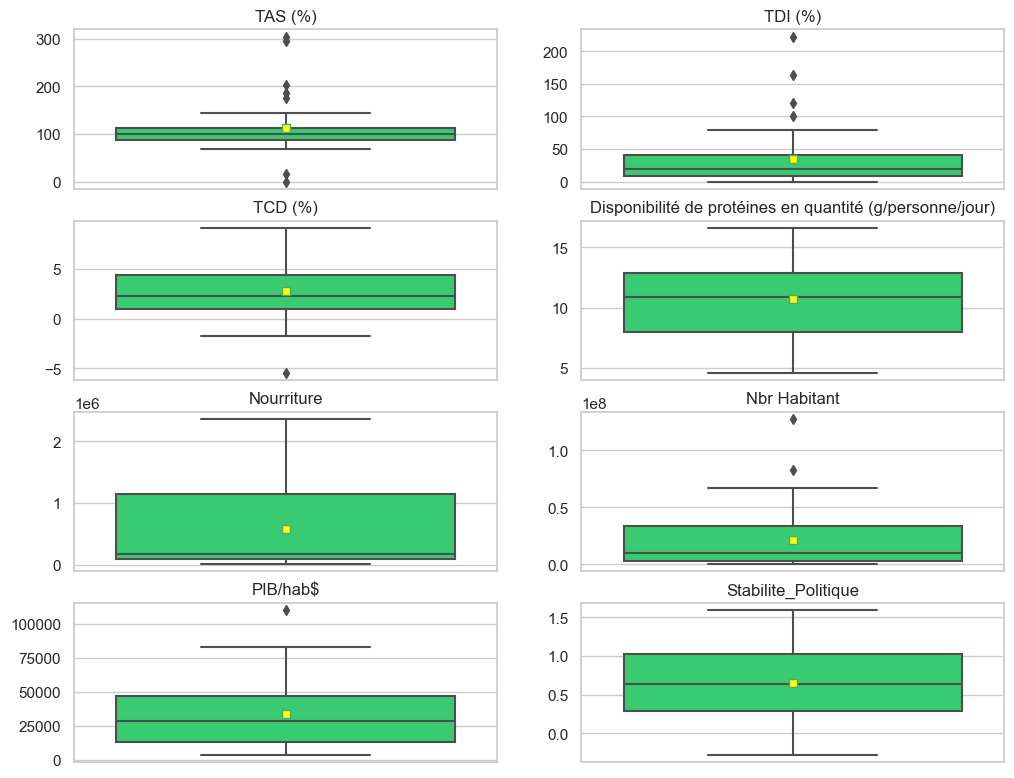

In [26]:
Boxplot(df_Dendro_Cluster1)

<h5 align="center"> <font color='#6F16B0'> Cluster 2  </font>  <h5>   

In [27]:
df_Dendro_Cluster2 = df.loc[df['cluster_dendro']==2,:]
df_Dendro_Cluster2.describe()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$,Stabilite_Politique,cluster_dendro
count,4.000000,4.000000,4.000000,4.000000e+00,4.000000,4.000000,4.000000e+00,4.00000,4.000000,4.000000,4.0
mean,29.565000,122.250000,10.080000,1.214125e+07,114.870000,0.797500,8.231543e+08,3.18250,19906.000000,-0.267500,2.0
std,26.253531,105.398846,9.181245,7.148008e+06,20.906962,1.169882,6.454718e+08,1.03558,26337.490073,0.460534,0.0
min,2.220000,7.000000,0.750000,2.965000e+06,96.830000,0.000000,2.078338e+08,2.09000,1938.000000,-0.760000,2.0
25%,9.802500,46.000000,3.157500,8.227750e+06,99.515000,0.022500,2.957720e+08,2.57750,7031.250000,-0.505000,2.0
50%,30.180000,131.500000,9.820000,1.375000e+07,110.190000,0.350000,8.318808e+08,3.06000,9313.000000,-0.325000,2.0
75%,49.942500,207.750000,16.742500,1.766350e+07,125.545000,1.125000,1.359263e+09,3.66500,22187.750000,-0.087500,2.0
max,55.680000,219.000000,19.930000,1.810000e+07,142.270000,2.490000,1.421022e+09,4.52000,59060.000000,0.340000,2.0


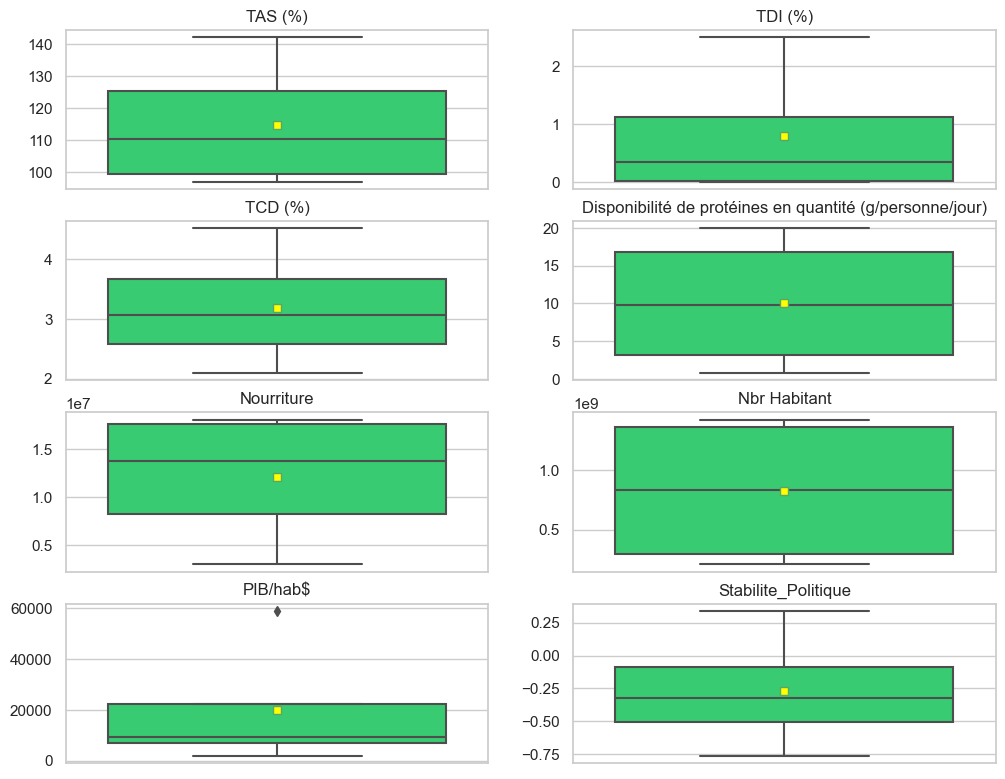

In [28]:
Boxplot(df_Dendro_Cluster2)

<h5 align="center"> <font color='#6F16B0'> Cluster 3  </font>  <h5>   

In [29]:
df_Dendro_Cluster3 = df.loc[df['cluster_dendro']==3,:]
df_Dendro_Cluster3.describe()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$,Stabilite_Politique,cluster_dendro
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,1.100000e+01,11.000000,11.000000,11.000000,11.0
mean,53.824545,203.545455,19.048182,129272.727273,14.890000,111.416364,2.385006e+06,3.004545,21864.636364,0.747273,3.0
std,11.365287,34.384193,4.913829,211799.948493,28.849799,77.051243,3.860538e+06,1.627897,15906.613412,0.575553,0.0
min,35.190000,147.000000,11.520000,3000.000000,0.000000,0.000000,5.204500e+04,0.620000,4246.000000,-0.890000,3.0
25%,44.585000,186.000000,15.150000,5000.000000,0.000000,91.610000,1.026265e+05,2.185000,8670.000000,0.700000,3.0
50%,54.100000,210.000000,19.000000,10000.000000,8.570000,100.000000,1.809540e+05,3.070000,16111.000000,0.890000,3.0
75%,60.730000,233.500000,22.070000,203500.000000,12.075000,108.800000,3.844038e+06,3.690000,36746.000000,1.000000,3.0
max,72.310000,243.000000,27.870000,556000.000000,98.900000,323.930000,9.487203e+06,6.580000,45737.000000,1.200000,3.0


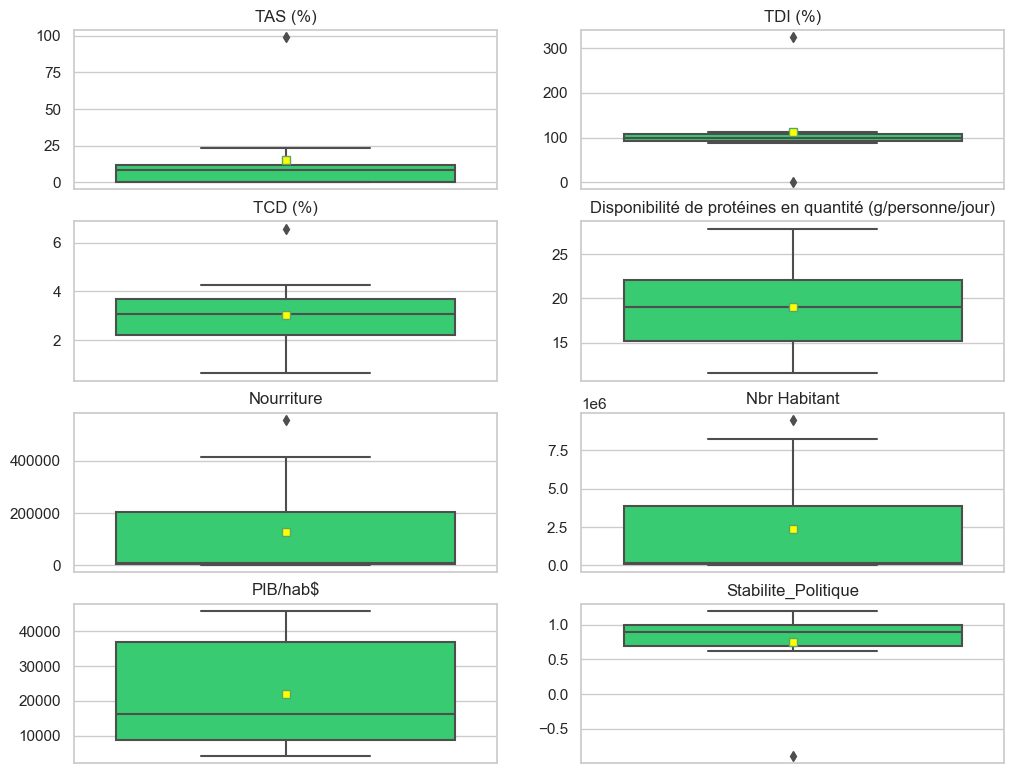

In [30]:
Boxplot(df_Dendro_Cluster3)

<h5 align="center"> <font color='#6F16B0'> Cluster 4  </font>  <h5>   

In [31]:
df_Dendro_Cluster4 = df.loc[df['cluster_dendro']==4,:]
df_Dendro_Cluster4.describe()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$,Stabilite_Politique,cluster_dendro
count,60.000000,60.000000,60.000000,6.000000e+01,60.000000,60.000000,6.000000e+01,60.000000,60.000000,60.000000,60.0
mean,15.897333,57.650000,5.483500,4.983500e+05,80.321833,33.878333,3.083240e+07,3.072667,6831.233333,-0.218333,4.0
std,8.280058,30.786209,2.866864,8.953210e+05,35.840025,34.199735,4.860242e+07,3.510458,6010.524198,0.712585,0.0
min,1.500000,7.000000,0.470000,2.000000e+03,4.880000,0.000000,1.141580e+05,-5.390000,487.000000,-1.870000,4.0
25%,9.067500,32.500000,2.915000,4.100000e+04,65.707500,3.977500,3.415362e+06,0.432500,2907.500000,-0.695000,4.0
50%,16.250000,56.500000,6.130000,1.300000e+05,90.115000,23.585000,1.060524e+07,3.310000,4889.000000,-0.255000,4.0
75%,21.035000,81.250000,7.222500,3.917500e+05,100.000000,56.070000,3.247854e+07,5.595000,8317.250000,0.170000,4.0
max,32.520000,123.000000,12.680000,4.509000e+06,190.240000,120.000000,2.646510e+08,9.100000,28122.000000,1.250000,4.0


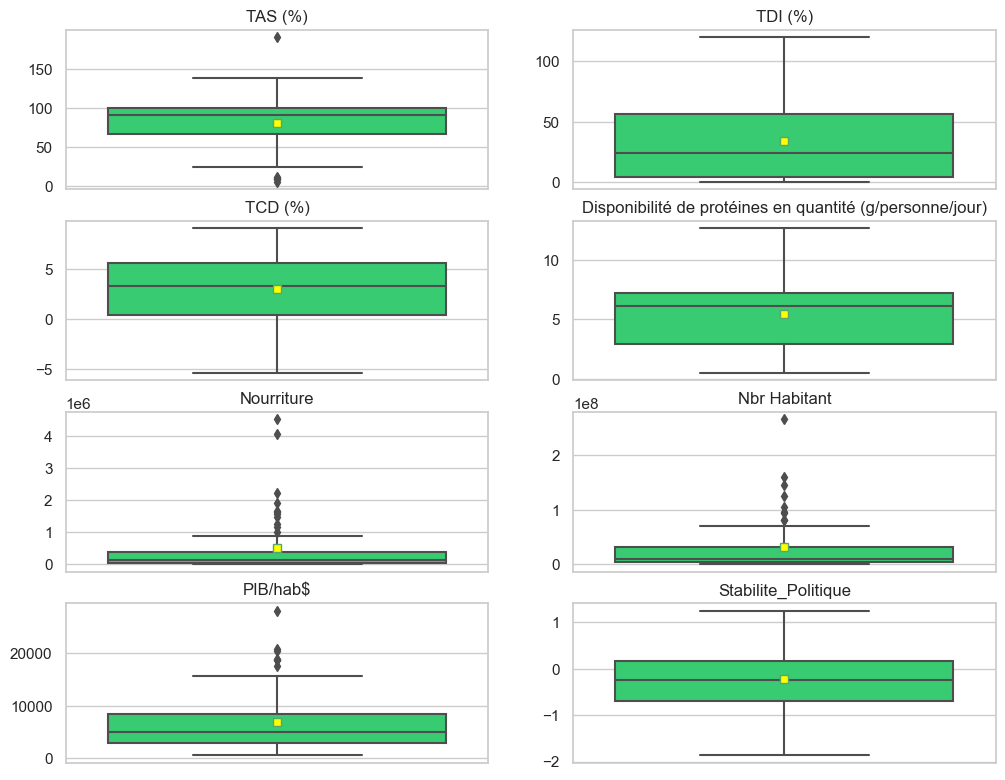

In [32]:
Boxplot(df_Dendro_Cluster4)

<h4 align="center"> <font color='#6F16B0'> Analyse par variables </font>  <h4>        

Text(0.5, 1.0, 'Stabilite_Politique')

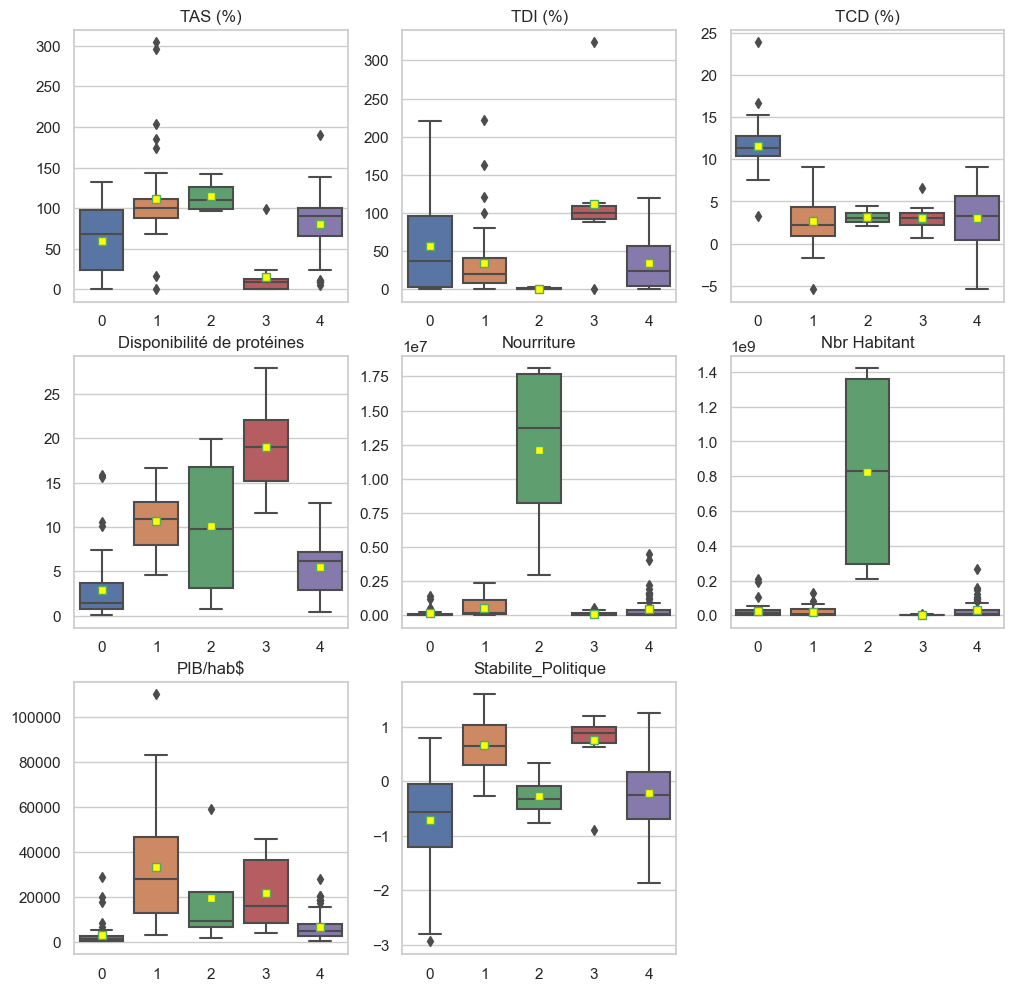

In [33]:
plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")

plt.subplot(331)
sns.boxplot(data=df, x='cluster_dendro', y='TAS (%)', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}).set(xlabel=None, ylabel=None)
plt.title('TAS (%)')   

plt.subplot(332)
sns.boxplot(data=df, x='cluster_dendro', y='TDI (%)', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}).set(xlabel=None, ylabel=None)
plt.title('TDI (%)')   

plt.subplot(333)
sns.boxplot(data=df, x='cluster_dendro', y='TCD (%)', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}).set(xlabel=None, ylabel=None)
plt.title('TCD (%)')

plt.subplot(334)
sns.boxplot(data=df, x='cluster_dendro', y='Disponibilité de protéines en quantité (g/personne/jour)', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}).set(xlabel=None, ylabel=None)
plt.title('Disponibilité de protéines')

plt.subplot(335)
sns.boxplot(data=df, x='cluster_dendro', y='Nourriture', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}).set(xlabel=None, ylabel=None)
plt.title('Nourriture')

plt.subplot(336)
sns.boxplot(data=df, x='cluster_dendro', y='Nbr Habitant', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}).set(xlabel=None, ylabel=None)
plt.title('Nbr Habitant')

plt.subplot(337)
sns.boxplot(data=df, x='cluster_dendro', y='PIB/hab$', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}).set(xlabel=None, ylabel=None)
plt.title('PIB/hab$')

plt.subplot(338)
sns.boxplot(data=df, x='cluster_dendro', y='Stabilite_Politique', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}).set(xlabel=None, ylabel=None)
plt.title('Stabilite_Politique')   

<h4 align="center"> <font color='#6F16B0'> Caractéristiques des groupes : </font>  <h4>       

- Cluster 0 --> Pays ou : 
    - disponibilité alimentaire forte
    - Grosse quantité de nourriture
    - TAS élevé
    - TDI faible 
    - Nbr habitant très élevé

- Cluster 1 --> Pays ou : 
    - Dispo alimentaire la plus forte
    - Faible quantité de nourriture
    - Stabilité politique stable

- Cluster 2 --> Pays ou : 
    - Dispo alimentaire dans la moyenne des autres pays
    - Nourriture dans la moyenne des autres pays
    - TAS élevé 
    - TDI assez élevé aussi (pays développé
    - PIB le plus élevé 
    - Stabilité politique la plus élevé

- Cluster 3 --> Pays ou : 
    - Dispo alimentaire dans la moyenne
    - Faible quantité de nourriture
    - TAS faible
    - TDI fort 

- Cluster 4 --> Pays ou : 
    - Dispo alimentaire faible
    - Faible quantité de nourriture
    - TCD forte
    - PIB le plus faible
    - Stabilité politique la plus faible

                                A savoir qu’on recherche un cluster avec :

- Un taux d'auto suffissance faible / très faible.
- Un taux de dépendance aux importations élevé / très élevé.
- Un taux de croissance démographique positif.
- Une disponibilité alimentaire de volaille faible ou assez faible.
- Un PIB/Hab moyen ou élevé.
- Une stabilité politique élevé ou assez élevé.

        
Le cluster 0 semble être le bon choix.           

<h2 align="center"> <font color='#6F16B0'> B.  Modèle du K-means </font>  <h2>     

<h3 align="center"> <font color='#6F16B0'> 1. Mise en place du modèle </font>  <h3>     

 > *L'objectif est de trouver des groupes en faisant en sorte de minimiser l'intertie intraclasse. K-mean travail avec les centres de gravité des groupes, on les appel aussi centroïdes. A chaque itération le centre de classe change jusqu'à trouver la convergence de l'aglorithme (plus rien de bouge d'une iteration à l'autre).*

In [34]:
dfStand.head()

,TAS (%),TDI (%),TCD (%),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,Nbr Habitant,PIB/hab$,Stabilite_Politique
Zone,,,,,,,,,,
Afghanistan,-0.610145,0.118183,1.421234,-1.182705,-1.151013,-1.179552,-0.285665,-0.051219,-0.696279,-3.022975
Afrique du Sud,-0.002694,-0.395128,0.155061,0.984516,1.134551,1.255382,0.631064,0.081867,-0.377359,-0.232598
Albanie,-1.050697,0.696309,-1.227865,-0.241842,0.173952,-0.153183,-0.289369,-0.265892,-0.490737,0.498214
Algérie,0.419587,-0.849411,0.624089,-0.875005,-0.869458,-0.922960,-0.188899,-0.018496,-0.510663,-0.941265
Allemagne,0.168723,0.070729,-0.722603,-0.044533,-0.057917,0.151856,0.433828,0.246660,1.576420,0.730746


In [35]:
X_scaled = dfStand.values

<h4 align="center"> <font color='#6F16B0'> Choix du nombres de cluster avec la méthode Silhouette </font>  <h4>      

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


[0.2755175363423787,
 0.20605803937591605,
 0.22034816503482202,
 0.23834423467844254,
 0.2569603176719692,
 0.22732782073179544,
 0.2026760033587705,
 0.19783373081079475]

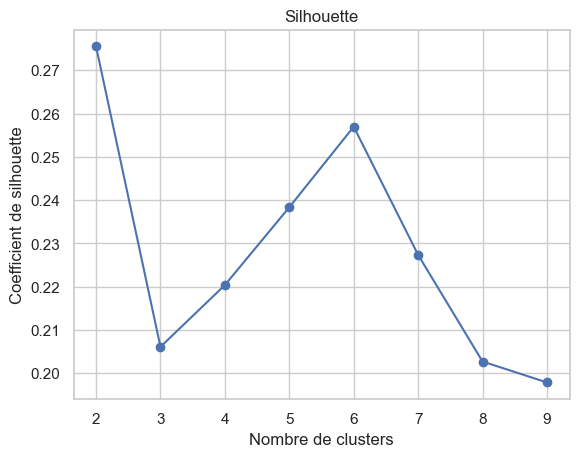

In [36]:
# Methode silhouette :
%pylab inline
np.random.seed(25)
silhouettes =[]
for num_clusters in range(2,10):
    cls = cluster.KMeans(n_clusters=num_clusters,
                        n_init=1, init='random')
    cls.fit(X_scaled)
    silh = metrics.silhouette_score(X_scaled, cls.labels_)
    silhouettes.append(silh)

#Graphique:
plt.title("Silhouette")
plt.xlabel("Nombre de clusters")
plt.ylabel("Coefficient de silhouette")
plt.plot(range(2,10), silhouettes, marker='o')
silhouettes

 > *Cette méthode permet d'évaluer la qualité des clusters créés grâce aux algorithmes de clustering. Compris entre [-1,1], le score silhouette est parfois utilisé pour trouver la valeur optimale du nombre de clusters « k ». Pour ce faire, on considère la valeur de « k » ayant le score de silhouette le plus proche de 1.*

 > *le coefficient de silhouette flucue beaucoup, les valeurs les plus hautes sont pour K=2 et K=6. Ici deux clusters ne nous interesse pas car il n'y aura pas assez de différence entre nos groupes. Notre coefficient silhouette nous conseil de prendre K pour que le max du coefficient de silhouette soit atteint, ici il faut privilégier 6 clusters.*

<h4 align="center"> <font color='#6F16B0'> Choix du nombres de cluster avec la méthode du coude </font>  <h4>     

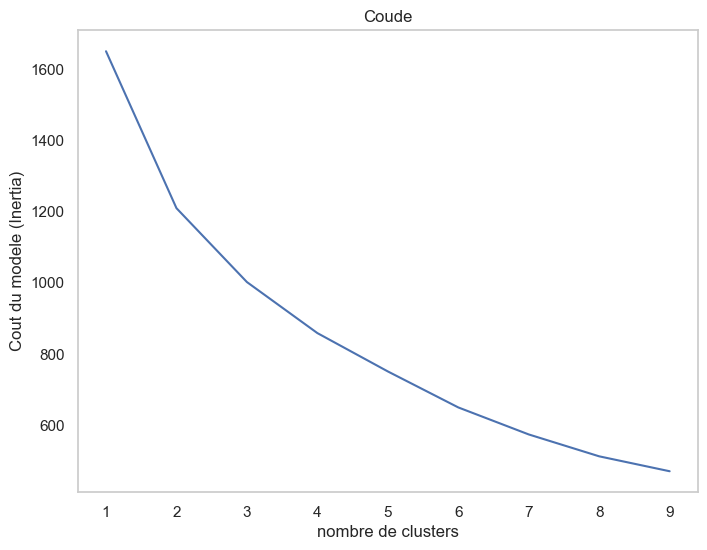

In [37]:
# Méthode du coude :
np.random.seed(25)
inertia = []
k_range=range(1,10)
for k in k_range:
    model=KMeans(n_clusters=k).fit(X_scaled)
    inertia.append(model.inertia_)

# Graphique:
fig = plt.figure(figsize=(8,6))
plt.plot(k_range,inertia )
plt.title("Coude")
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')
plt.grid()
plt.show()

 > *méthode du coude : La méthode du coude est utilisée pour déterminer la valeur optimale de k.L’emplacement d’une courbe (coude) dans le graphique est généralement considéré comme un indicateur du nombre approprié de groupes. Les distances ne varient plus rapidement après cette inflexion, c'est-à-dire qu'une augmentation de k n'aura pas un grand effet sur les distances entre les points de données et leurs centroïdes respectives. Par conséquent, nous pouvons estimer à cet endroit, que l'on arrive à la valeur optimale de K. Ici on peut voir une légère flexion à partir de K=6, les distances ne varient plus rapidement après.*

In [38]:
# Entrainement du modèle sur notre jeu de données

np.random.seed(25)
model = KMeans(n_clusters=6)
model.fit(X_scaled)
model.labels_

array([0, 1, 1, 0, 3, 4, 2, 2, 1, 4, 3, 3, 0, 2, 0, 2, 3, 1, 1, 1, 4, 5,
       1, 0, 1, 4, 4, 0, 0, 3, 1, 2, 3, 5, 1, 1, 4, 1, 1, 1, 0, 3, 2, 1,
       1, 1, 0, 1, 3, 3, 1, 4, 4, 4, 2, 1, 0, 4, 4, 1, 1, 4, 1, 1, 5, 0,
       1, 4, 3, 3, 2, 1, 2, 3, 0, 1, 0, 4, 1, 2, 4, 1, 0, 4, 1, 3, 4, 0,
       1, 0, 0, 3, 1, 1, 4, 1, 4, 1, 0, 1, 4, 1, 0, 0, 3, 3, 0, 4, 0, 0,
       1, 0, 3, 0, 1, 1, 1, 1, 3, 0, 0, 1, 1, 1, 0, 0, 2, 2, 2, 2, 4, 1,
       4, 1, 1, 0, 0, 3, 1, 3, 0, 4, 0, 1, 1, 4, 0, 2, 0, 0, 0, 1, 1, 4,
       1, 1, 0, 0, 0, 0, 2, 1, 5, 0, 4])

In [39]:
# Ajoute une colonne au dfStand et au df avec le groupe correspondant au cluster réalisé par le Kmeans sur 6 K.

dfStand["cluster_Kmeans"] = model.labels_
df["cluster_Kmeans"] = model.labels_
df.head()

,Zone,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$,Stabilite_Politique,cluster_dendro,cluster_Kmeans
0,Afghanistan,1.53,5.0,0.54,55000.0,49.12,50.88,36296113.0,12.48,530.0,-2.80,0,0
1,Afrique du Sud,35.69,143.0,14.11,2035000.0,78.71,24.27,57009756.0,6.19,6724.0,-0.28,1,1
2,Albanie,16.36,85.0,6.26,47000.0,27.66,80.85,2884169.0,-0.68,4522.0,0.38,4,1
3,Algérie,6.38,22.0,1.97,264000.0,99.28,0.72,41389189.0,8.52,4135.0,-0.92,4,0
4,Allemagne,19.47,71.0,7.96,1609000.0,87.06,48.42,82658409.0,1.83,44670.0,0.59,1,3


<h3 align="center"> <font color='#6F16B0'> 2. Analyse de nos groupes avec le K-Means </font>  <h3>       

In [40]:
# Comprendre la caractérisation des clusters:

df.groupby(['cluster_Kmeans']).mean()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$,Stabilite_Politique,cluster_dendro
cluster_Kmeans,,,,,,,,,,,
0,6.024048,21.000000,2.043333,2.612619e+05,91.712381,11.080714,4.593764e+07,9.276667,2376.690476,-0.993810,1.619048
1,24.075000,89.339286,8.302143,6.107679e+05,97.978929,27.107143,2.377992e+07,1.881429,10672.339286,0.094286,2.875000
2,52.131250,194.500000,18.040000,2.051250e+05,30.566250,88.174375,4.248968e+06,3.956875,20569.875000,0.571875,2.250000
3,25.015000,94.750000,9.943500,5.923000e+05,104.929500,59.287500,2.433258e+07,3.257500,56375.900000,1.000500,1.150000
4,10.166667,33.740741,3.525556,7.444444e+04,23.071481,103.747778,7.255260e+06,9.558519,3148.740741,-0.117407,1.037037
5,29.565000,122.250000,10.080000,1.214125e+07,114.870000,0.797500,8.231543e+08,3.182500,19906.000000,-0.267500,2.000000


In [41]:
# Faire une boucle pour récupérer la liste de mes pays par cluster

for i in range(6):
    print(f'Cluster {i}')
    print(dfStand[dfStand.cluster_Kmeans==i].index.tolist())
    print()

Cluster 0
['Afghanistan', 'Algérie', 'Azerbaïdjan', 'Bangladesh', 'Burkina Faso', 'Cambodge', 'Cameroun', "Côte d'Ivoire", 'Eswatini', 'Guatemala', 'Indonésie', 'Jordanie', 'Kenya', 'Liban', 'Madagascar', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Nigéria', 'Népal', 'Ouganda', 'Pakistan', 'Paraguay', 'Philippines', 'Rwanda', 'République centrafricaine', 'République populaire démocratique de Corée', 'République-Unie de Tanzanie', 'Soudan', 'Sri Lanka', 'Sénégal', 'Tchad', 'Togo', 'Tunisie', 'Turkménistan', 'Turquie', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte', 'Éthiopie']

Cluster 1
['Afrique du Sud', 'Albanie', 'Argentine', 'Belize', 'Bolivie (État plurinational de)', 'Bosnie-Herzégovine', 'Bulgarie', 'Bélarus', 'Chili', 'Chypre', 'Colombie', 'Costa Rica', 'Croatie', 'Cuba', 'El Salvador', 'Espagne', 'Estonie', 'Fidji', 'Fédération de Russie', 'Grèce', 'Guyana', 'Géorgie', 'Honduras', 'Hongrie', "Iran (République islamique d')", 'Italie', 'Kazakhstan', 'Kiribati', 'Lettonie', 'Lituanie', '

<h4 align="center"> <font color='#6F16B0'> Analyse par Cluster </font>  <h4>    

<h5 align="center"> <font color='#6F16B0'> Cluster 0 </font>  <h5>       

In [42]:
df_Kmeans_0 = df.loc[df['cluster_Kmeans']==0,:]
df_Kmeans_0.describe()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$,Stabilite_Politique,cluster_dendro,cluster_Kmeans
count,42.000000,42.000000,42.000000,4.200000e+01,42.000000,42.000000,4.200000e+01,42.000000,42.000000,42.000000,42.000000,42.0
mean,6.024048,21.000000,2.043333,2.612619e+05,91.712381,11.080714,4.593764e+07,9.276667,2376.690476,-0.993810,1.619048,0.0
std,6.300545,21.848704,2.177680,4.769475e+05,15.966951,13.697618,5.961147e+07,3.914367,2293.394656,0.782173,1.987183,0.0
min,0.130000,0.000000,0.040000,7.000000e+03,49.120000,0.000000,1.124805e+06,2.010000,415.000000,-2.940000,0.000000,0.0
25%,1.685000,7.000000,0.562500,4.175000e+04,82.160000,0.000000,1.443163e+07,6.412500,764.500000,-1.387500,0.000000,0.0
50%,3.505000,13.500000,1.175000,7.000000e+04,97.160000,2.670000,2.301993e+07,10.485000,1494.500000,-0.925000,0.000000,0.0
75%,7.157500,24.750000,2.412500,1.942500e+05,100.000000,20.517500,4.133354e+07,12.030000,3759.750000,-0.500000,4.000000,0.0
max,28.070000,98.000000,10.100000,1.904000e+06,132.650000,50.880000,2.646510e+08,16.740000,10464.000000,0.150000,4.000000,0.0


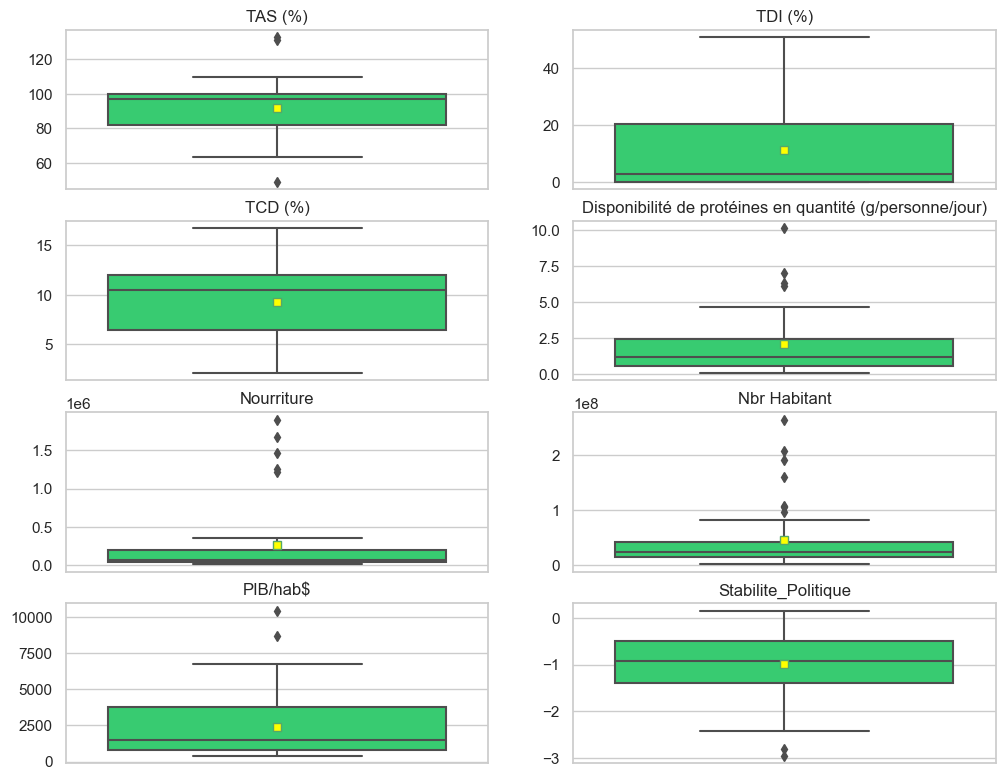

In [43]:
Boxplot(df_Kmeans_0)

<h5 align="center"> <font color='#6F16B0'> Cluster 1 </font>  <h5>    

In [44]:
df_Kmeans_1 = df.loc[df['cluster_Kmeans']==1,:]
df_Kmeans_1.describe()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$,Stabilite_Politique,cluster_dendro,cluster_Kmeans
count,56.00000,56.000000,56.000000,5.600000e+01,56.000000,56.000000,5.600000e+01,56.000000,56.000000,56.000000,56.000000,56.0
mean,24.07500,89.339286,8.302143,6.107679e+05,97.978929,27.107143,2.377992e+07,1.881429,10672.339286,0.094286,2.875000,1.0
std,8.32075,33.788797,2.771850,9.176015e+05,37.162453,28.936358,3.145430e+07,3.429777,7558.505286,0.627291,1.465513,0.0
min,9.12000,33.000000,2.970000,2.000000e+03,8.480000,0.000000,1.141580e+05,-5.430000,1304.000000,-1.870000,1.000000,1.0
25%,17.66000,62.750000,6.257500,5.475000e+04,80.045000,4.650000,3.415362e+06,-0.620000,5740.500000,-0.280000,1.000000,1.0
50%,22.34000,85.500000,7.870000,2.400000e+05,98.045000,13.510000,1.000918e+07,1.380000,8177.000000,0.125000,4.000000,1.0
75%,30.43750,109.250000,9.832500,8.645000e+05,107.297500,44.932500,3.617424e+07,5.137500,15108.000000,0.557500,4.000000,1.0
max,42.24000,182.000000,14.110000,4.509000e+06,203.370000,104.880000,1.455301e+08,8.690000,32694.000000,1.120000,4.000000,1.0


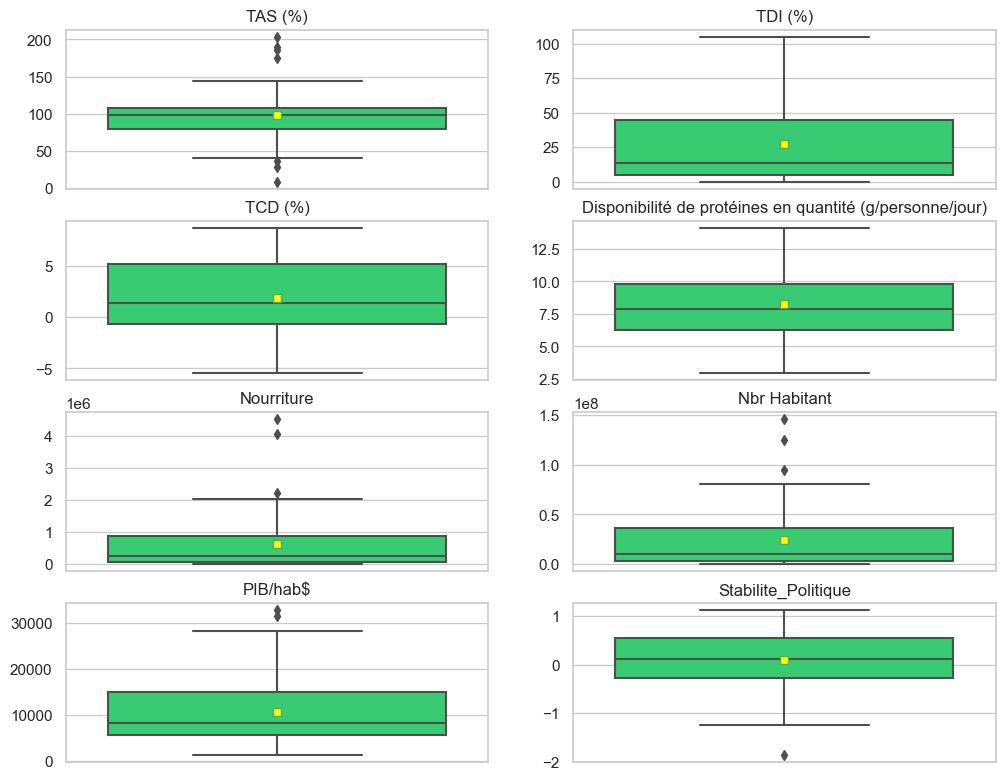

In [45]:
Boxplot(df_Kmeans_1)

<h5 align="center"> <font color='#6F16B0'> Cluster 2 </font>  <h5>    

In [46]:
df_Kmeans_2 = df.loc[df['cluster_Kmeans']==2,:]
df_Kmeans_2.describe()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$,Stabilite_Politique,cluster_dendro,cluster_Kmeans
count,16.000000,16.000000,16.000000,1.600000e+01,16.000000,16.000000,1.600000e+01,16.000000,16.000000,16.000000,16.000000,16.0
mean,52.131250,194.500000,18.040000,2.051250e+05,30.566250,88.174375,4.248968e+06,3.956875,20569.875000,0.571875,2.250000,2.0
std,9.900379,33.085747,4.306652,3.725374e+05,36.380785,73.384238,8.348323e+06,3.778031,13870.276973,0.615188,1.183216,0.0
min,35.190000,147.000000,11.520000,3.000000e+03,0.000000,0.000000,5.204500e+04,0.620000,4246.000000,-0.890000,0.000000,2.0
25%,45.142500,172.500000,15.457500,7.250000e+03,0.000000,45.297500,1.106122e+05,2.112500,8989.500000,0.302500,1.000000,2.0
50%,52.305000,191.000000,16.250000,1.450000e+04,12.075000,91.610000,3.339935e+05,2.785000,16977.000000,0.790000,3.000000,2.0
75%,56.000000,221.000000,19.885000,2.387500e+05,52.262500,101.275000,4.868655e+06,4.045000,29686.000000,0.990000,3.000000,2.0
max,72.310000,243.000000,27.870000,1.435000e+06,98.900000,323.930000,3.310118e+07,15.020000,45737.000000,1.200000,3.000000,2.0


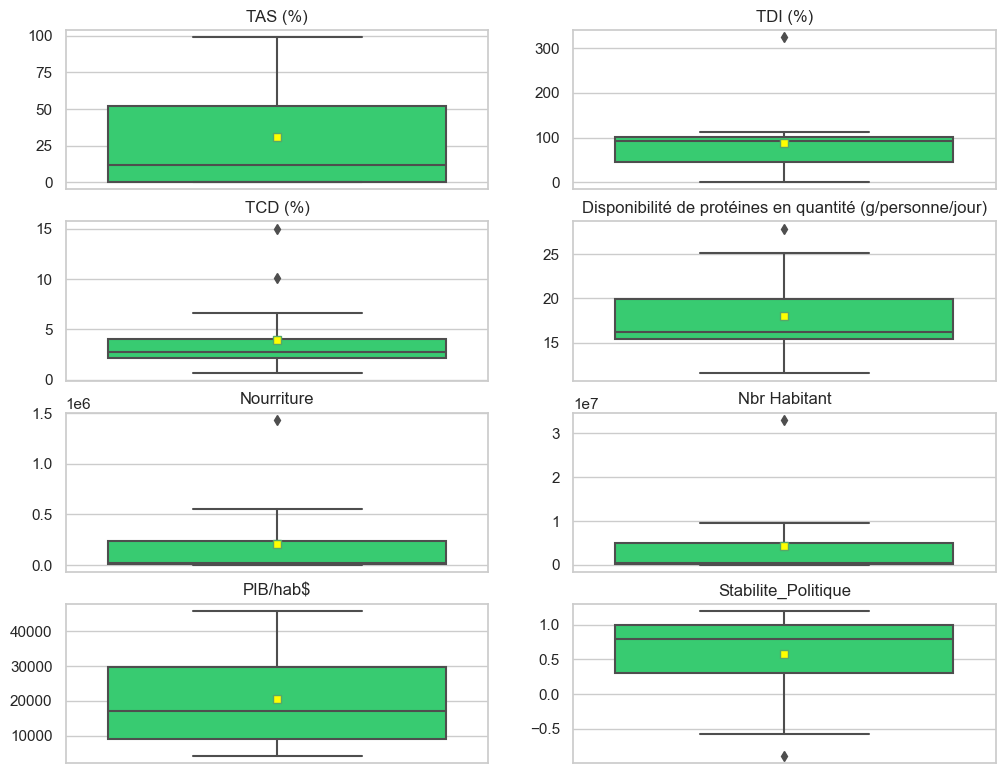

In [47]:
Boxplot(df_Kmeans_2)

<h5 align="center"> <font color='#6F16B0'> Cluster 3 </font>  <h5>    

In [48]:
df_Kmeans_3 = df.loc[df['cluster_Kmeans']==3,:]
df_Kmeans_3.describe()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$,Stabilite_Politique,cluster_dendro,cluster_Kmeans
count,20.000000,20.000000,20.000000,2.000000e+01,20.000000,20.000000,2.000000e+01,20.000000,20.000000,20.000000,20.00000,20.0
mean,25.015000,94.750000,9.943500,5.923000e+05,104.929500,59.287500,2.433258e+07,3.257500,56375.900000,1.000500,1.15000,3.0
std,9.067904,38.868029,3.189503,7.817095e+05,74.575478,57.046761,3.453693e+07,2.276534,19705.820203,0.359129,0.67082,0.0
min,12.650000,44.000000,4.570000,1.000000e+04,0.000000,0.600000,3.343930e+05,-0.630000,28122.000000,0.280000,1.00000,3.0
25%,18.457500,66.750000,7.427500,1.025000e+05,83.270000,18.602500,4.740468e+06,1.790000,44005.000000,0.885000,1.00000,3.0
50%,21.615000,81.500000,8.715000,1.620000e+05,95.300000,44.595000,8.637852e+06,2.870000,47945.500000,1.065000,1.00000,3.0
75%,30.447500,114.000000,12.417500,1.236500e+06,109.090000,77.915000,2.762149e+07,4.120000,70859.500000,1.252500,1.00000,3.0
max,47.650000,192.000000,16.600000,2.359000e+06,304.610000,222.370000,1.275027e+08,9.100000,110203.000000,1.590000,4.00000,3.0


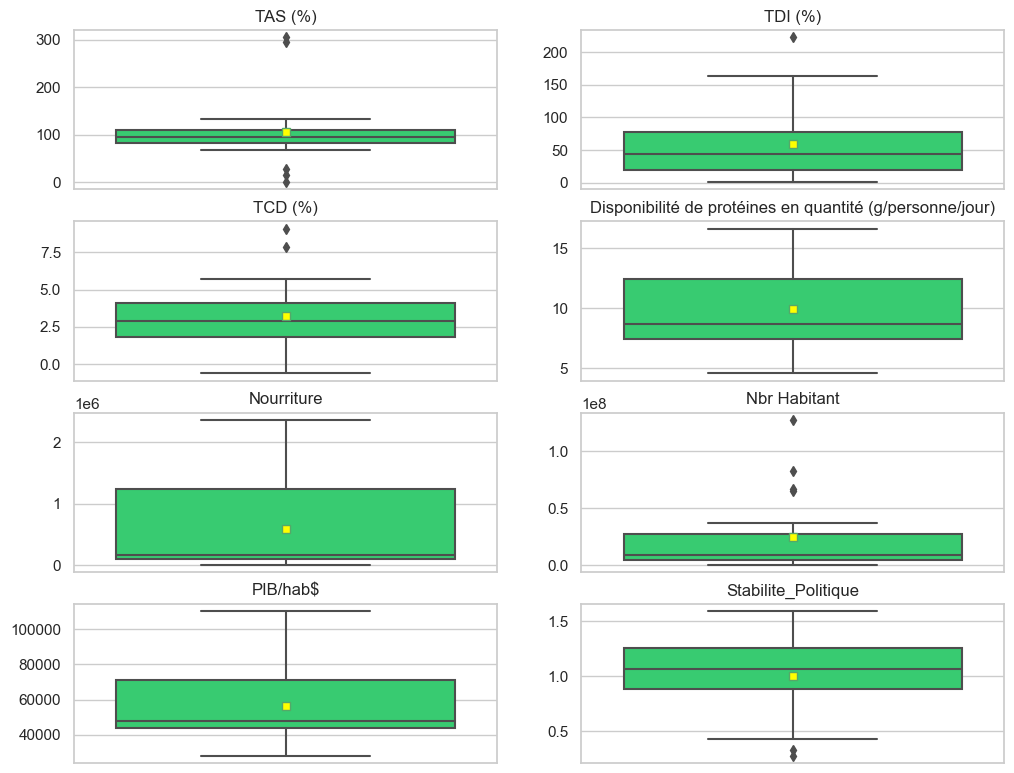

In [49]:
Boxplot(df_Kmeans_3)

<h5 align="center"> <font color='#6F16B0'> Cluster 4 </font>  <h5>    

In [50]:
df_Kmeans_4 = df.loc[df['cluster_Kmeans']==4,:]
df_Kmeans_4.describe()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$,Stabilite_Politique,cluster_dendro,cluster_Kmeans
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,2.700000e+01,27.000000,27.000000,27.000000,27.000000,27.0
mean,10.166667,33.740741,3.525556,74444.444444,23.071481,103.747778,7.255260e+06,9.558519,3148.740741,-0.117407,1.037037,4.0
std,7.153164,24.486405,2.567178,121504.774624,20.320625,42.020867,9.670251e+06,4.577469,3503.004321,0.679387,1.786304,0.0
min,2.160000,7.000000,0.740000,2000.000000,0.000000,42.860000,2.070890e+05,0.290000,487.000000,-2.310000,0.000000,4.0
25%,4.160000,13.000000,1.435000,8500.000000,7.770000,80.580000,2.073409e+06,7.685000,1078.500000,-0.515000,0.000000,4.0
50%,8.910000,31.000000,2.750000,30000.000000,20.000000,96.000000,3.113786e+06,10.180000,1999.000000,-0.100000,0.000000,4.0
75%,14.675000,46.000000,5.175000,79500.000000,29.220000,109.810000,8.184346e+06,11.510000,4042.500000,0.195000,2.000000,4.0
max,29.330000,99.000000,10.590000,561000.000000,75.000000,220.000000,3.755278e+07,23.940000,17803.000000,1.020000,4.000000,4.0


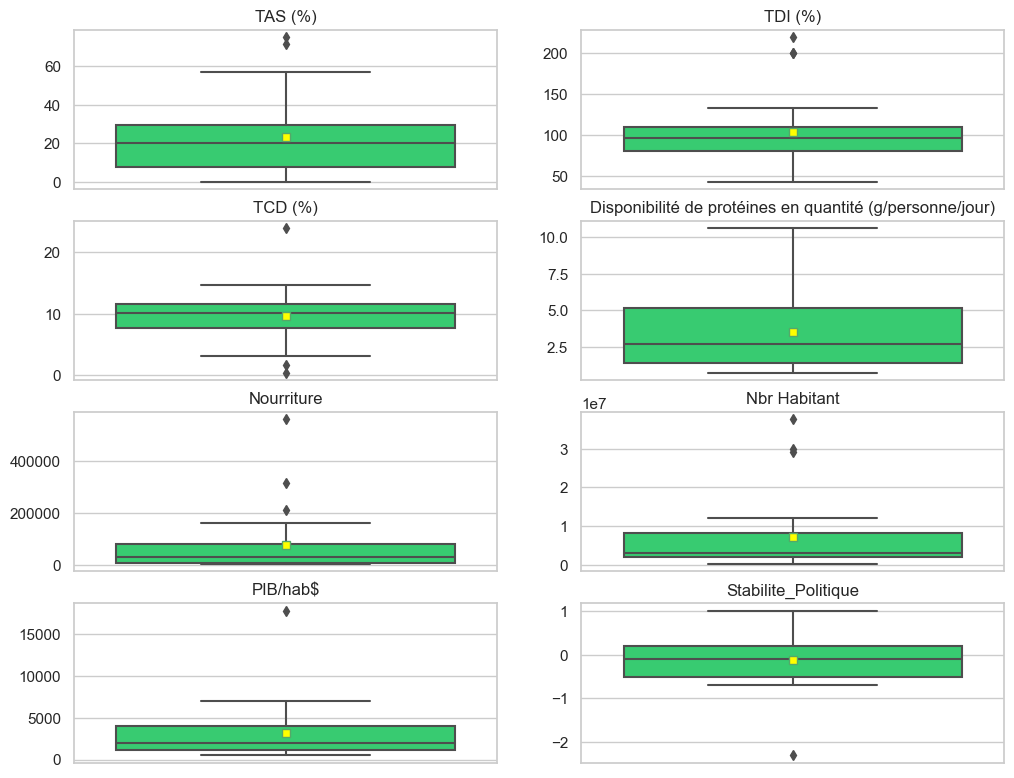

In [51]:
Boxplot(df_Kmeans_4)

<h5 align="center"> <font color='#6F16B0'> Cluster 5 </font>  <h5>    

In [52]:
df_Kmeans_5 = df.loc[df['cluster_Kmeans']==5,:]
df_Kmeans_5.describe()

,Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Nourriture,TAS (%),TDI (%),Nbr Habitant,TCD (%),PIB/hab$,Stabilite_Politique,cluster_dendro,cluster_Kmeans
count,4.000000,4.000000,4.000000,4.000000e+00,4.000000,4.000000,4.000000e+00,4.00000,4.000000,4.000000,4.0,4.0
mean,29.565000,122.250000,10.080000,1.214125e+07,114.870000,0.797500,8.231543e+08,3.18250,19906.000000,-0.267500,2.0,5.0
std,26.253531,105.398846,9.181245,7.148008e+06,20.906962,1.169882,6.454718e+08,1.03558,26337.490073,0.460534,0.0,0.0
min,2.220000,7.000000,0.750000,2.965000e+06,96.830000,0.000000,2.078338e+08,2.09000,1938.000000,-0.760000,2.0,5.0
25%,9.802500,46.000000,3.157500,8.227750e+06,99.515000,0.022500,2.957720e+08,2.57750,7031.250000,-0.505000,2.0,5.0
50%,30.180000,131.500000,9.820000,1.375000e+07,110.190000,0.350000,8.318808e+08,3.06000,9313.000000,-0.325000,2.0,5.0
75%,49.942500,207.750000,16.742500,1.766350e+07,125.545000,1.125000,1.359263e+09,3.66500,22187.750000,-0.087500,2.0,5.0
max,55.680000,219.000000,19.930000,1.810000e+07,142.270000,2.490000,1.421022e+09,4.52000,59060.000000,0.340000,2.0,5.0


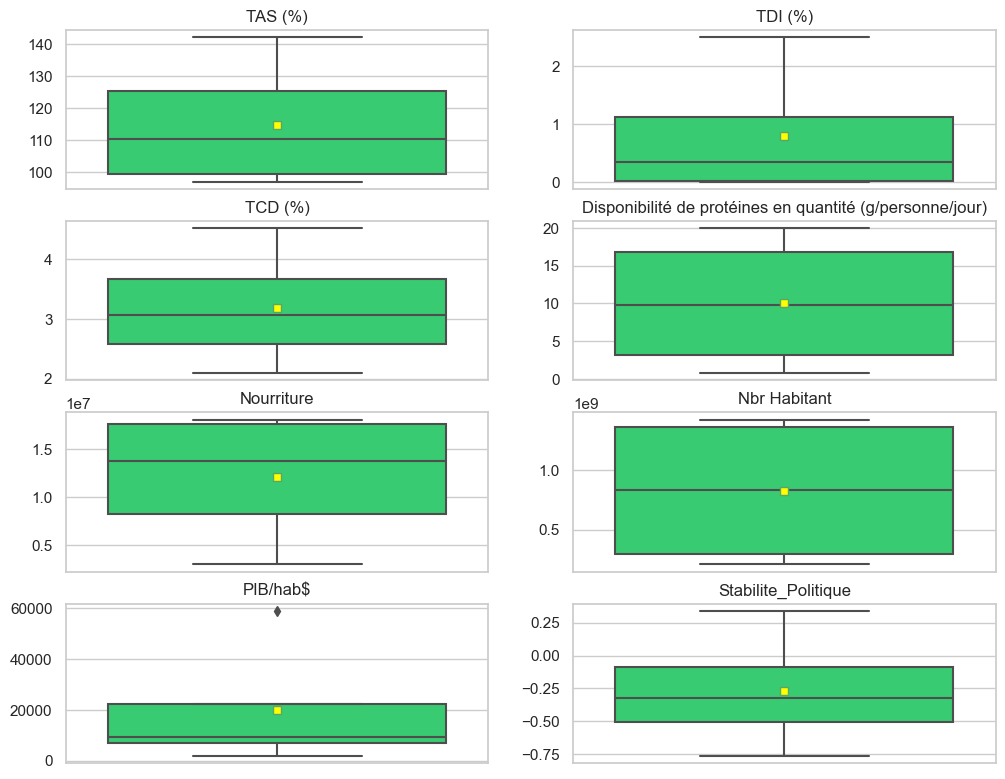

In [53]:
Boxplot(df_Kmeans_5)

<h4 align="center"> <font color='#6F16B0'> Analyse par variables </font>  <h4>       

Text(0.5, 1.0, 'Stabilite_Politique')

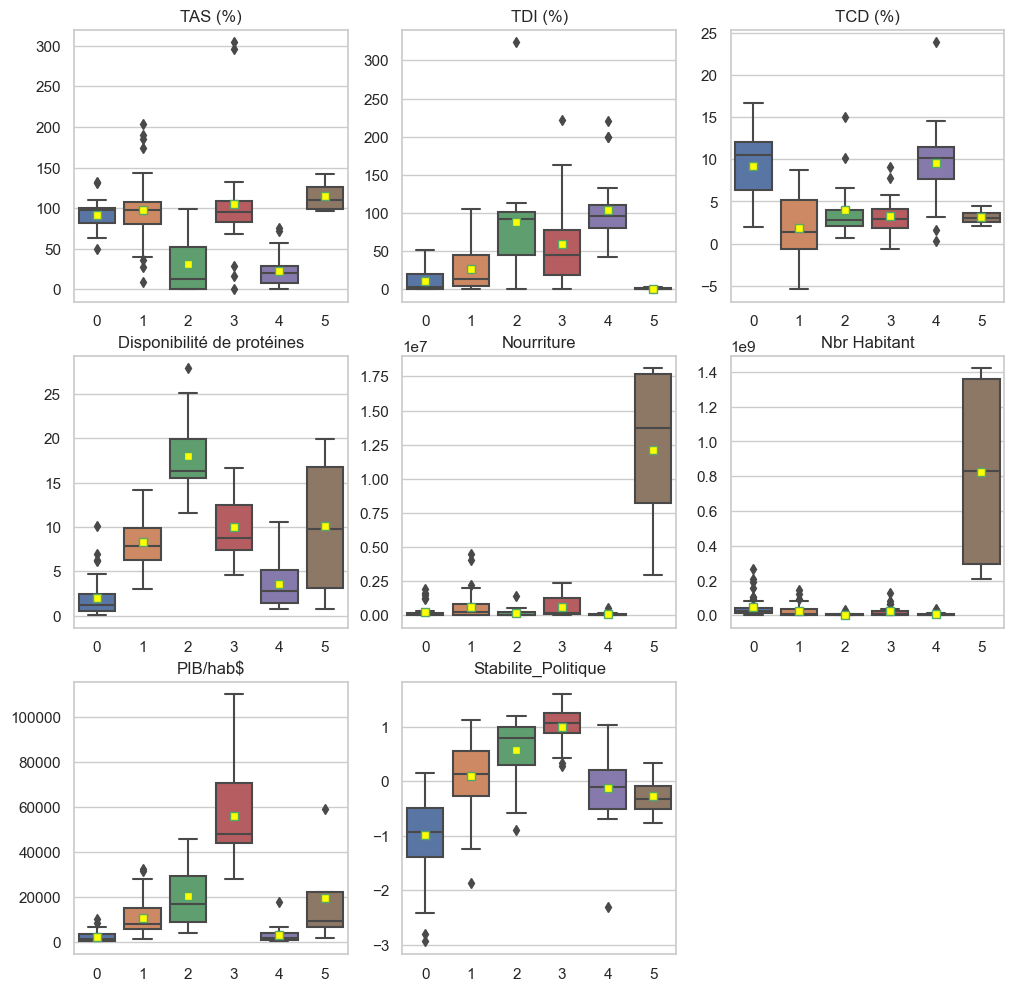

In [54]:
plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")

plt.subplot(331)
sns.boxplot(data=df, x='cluster_Kmeans', y='TAS (%)', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}).set(xlabel=None, ylabel=None)
plt.title('TAS (%)')   

plt.subplot(332)
sns.boxplot(data=df, x='cluster_Kmeans', y='TDI (%)', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}).set(xlabel=None, ylabel=None)
plt.title('TDI (%)')   

plt.subplot(333)
sns.boxplot(data=df, x='cluster_Kmeans', y='TCD (%)', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}).set(xlabel=None, ylabel=None)
plt.title('TCD (%)')

plt.subplot(334)
sns.boxplot(data=df, x='cluster_Kmeans', y='Disponibilité de protéines en quantité (g/personne/jour)', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}).set(xlabel=None, ylabel=None)
plt.title('Disponibilité de protéines')

plt.subplot(335)
sns.boxplot(data=df, x='cluster_Kmeans', y='Nourriture', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}).set(xlabel=None, ylabel=None)
plt.title('Nourriture')

plt.subplot(336)
sns.boxplot(data=df, x='cluster_Kmeans', y='Nbr Habitant', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}).set(xlabel=None, ylabel=None)
plt.title('Nbr Habitant')

plt.subplot(337)
sns.boxplot(data=df, x='cluster_Kmeans', y='PIB/hab$', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}).set(xlabel=None, ylabel=None)
plt.title('PIB/hab$')

plt.subplot(338)
sns.boxplot(data=df, x='cluster_Kmeans', y='Stabilite_Politique', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}).set(xlabel=None, ylabel=None)
plt.title('Stabilite_Politique')   

Text(0.5, 1.0, 'Nbr Habitant')

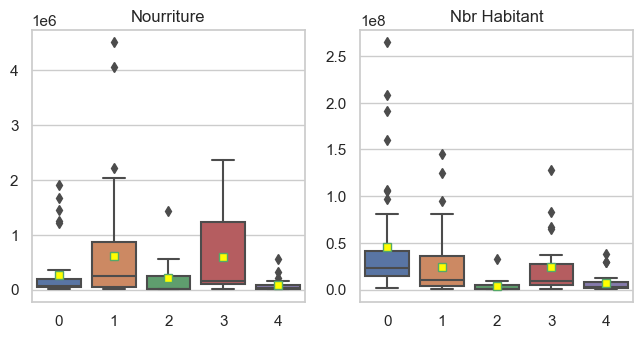

In [55]:
# On regarde les variables Nourriture et Nbr habitant sans le cluster 5 pour mieux voir la distribution sur les autres clusters

df_Kmeans_HorsCluster5 = df.loc[df['cluster_Kmeans']!=5,:]

plt.figure(figsize=(12, 12))
sns.set(style="whitegrid")

plt.subplot(331)
sns.boxplot(data=df_Kmeans_HorsCluster5, x='cluster_Kmeans', y='Nourriture', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}).set(xlabel=None, ylabel=None)
plt.title('Nourriture')

plt.subplot(332)
sns.boxplot(data=df_Kmeans_HorsCluster5, x='cluster_Kmeans', y='Nbr Habitant', showmeans=True, meanprops={"marker":"s","markerfacecolor":"yellow"}).set(xlabel=None, ylabel=None)
plt.title('Nbr Habitant')

<h4 align="center"> <font color='#6F16B0'> Caractéristiques des groupes : </font>  <h4>           

- GROUPE 0: 
   - Un taux d'auto suffissance élevé
   - Un taux de dépendance à l'importation des plus faible
   - Un taux de croissance démographique des plus élevé
   - Une disponibilité de protéine des plus faible
   - Un Pib/Hab des plus faible
   - Une stabilité politique des moins stable
        
- GROUPE 1:
    - Un taux d'auto suffissance élevé
    - Un taux de dépendance à l'importation faible
    - Un taux de croissance démographique des plus faible
    - Une disponibilité de protéine dans la moyenne
    - Un Pib/Hab faible
    - Une stabilité politique peu stable
        
- GROUPE 2:
    - Un taux d'auto suffissance des plus faible
    - Un taux de dépendance à l'importation des plus élevé
    - Un taux de croissance démographique faible
    - Une disponibilité de protéine des plus élevé
    - Un Pib/Hab faible
    - Une stabilité politique stable
        
- GROUPE 3:
   - Un taux d'auto suffissance élevé
   - Un taux de dépendance à l'importation faible
   - Un taux de croissance démographique faible
   - Une disponibilité de protéine dans la moyenne
   - Un Pib/Hab des plus élevé
   - Une stabilité politique très stable
        
- GROUPE 4:
  - Un taux d'auto suffissance des plus faible
  - Un taux de dépendance à l'importation des plus élevé
  - Un taux de croissance démographique des plus élevé
  - Une disponibilité de protéine des plus faible
  - Un Pib/Hab des plus faible
  - Une stabilité politique peu stable
    
- GROUPE 5:
   - Un taux d'auto suffissance des plus élevé
   - Un taux de dépendance à l'importation des plus faible
   - Un taux de croissance démographique faible
   - Une disponibilité de protéine dans la moyenne
   - Un Pib/Hab faible
   - Une stabilité politique des moins stable

                                        On cherche un cluster avec : 
- Un taux d'auto suffisance faible / très faible pour qu'il soit ouvert aux importations
- Un taux de dépendance aux importations élevé / très élevé
- Un taux de croissance démographique positif qui permettrait de voir son marché de poulet prospérer dans le temps (éviter un vieillissement de la population qui sera moins enclin a manger de la viande par exemple ...)
- Une disponibilité alimentaire de volaille faible ou assez faible
- Un PIB/Hab moyen ou élevé afin d'éviter les pays avec peu de moyen qui ne pourrait pas acheter ce type d'aliment, si on part de l'hypothèse on ou cherche à vendre du poulet de qualité
- Une stabilité politique élevé ou assez élevé qui permettrait de voir son marché de poulet prospérer dans le temps (éviter d'installer un marché si le pays rentre en guerre etc...)
- Pour la quantité de nourriture et le nbr d'habitant nous n'avons pas de préférence pour sélectionner notre Cluster.

cluster 4 : semble être le bon choix.

Groupe 4 : ['Angola', 'Arménie', 'Botswana', 'Bénin', 'Cabo Verde', 'Congo', 'Gabon', 'Gambie', 'Ghana', 'Guinée', 'Guinée-Bissau', 'Haïti', 'Iraq', 'Kirghizistan', 'Lesotho', 'Libéria', 'Macédoine du Nord', 'Mauritanie', 'Mongolie', 'Namibie', 'Oman', 'Sao Tomé-et-Principe', 'Sierra Leone', 'Tadjikistan', 'Timor-Leste', 'Vanuatu', 'Îles Salomon']

<h1 align="center"> <font color='#6F16B0'> IV. Application K-means sur notre ACP et conclusion </font>  <h1>       

In [56]:
# On re applique notre ACP sur 4 composantes sur le dataset normalisé

dfStand_TMP = dfStand.drop(columns=['cluster_Kmeans'])
X_Scaled=dfStand_TMP.values
n_components = 4
pca = decomposition.PCA(n_components=n_components)
pca.fit(X_Scaled)
X_proj = pca.transform(X_Scaled)

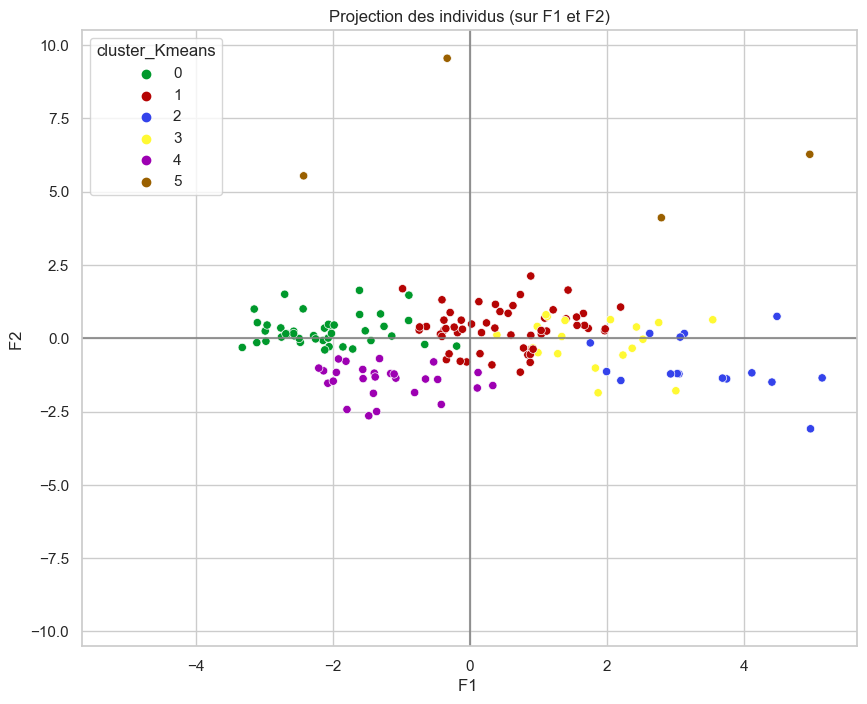

In [57]:
# On passe par la fonction display : 
# On regarde nos clusters sur les 2 premières composantes de l'ACP : 

x_y = [0,1]
display_factorial_planes(X_proj, x_y,  clusters=df["cluster_Kmeans"], alpha=1)

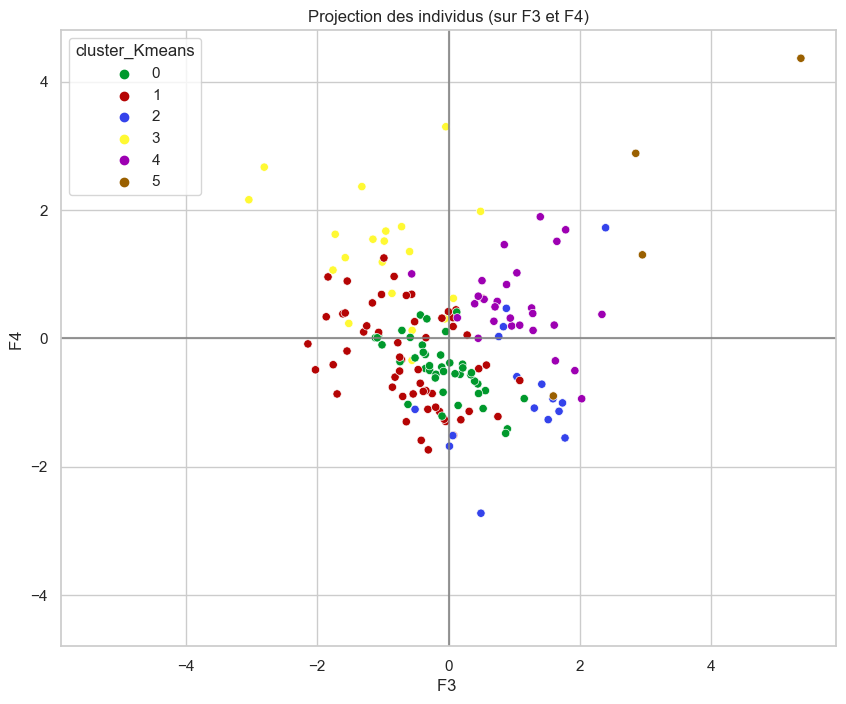

In [58]:
# On regarde nos clusters sur les 2 autres composantes de l'ACP : 

x_y = [2,3]
display_factorial_planes(X_proj, x_y,  clusters=df["cluster_Kmeans"], alpha=1)